In [1]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [13]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    # Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choixxieme_choix=premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [14]:
play_game(Strategie.CHANGER)

False

In [15]:
seed()
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
# Les deux prochains appels vont retourner le même résultat que les deux précédents
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

Premier nombre aléatoire: 36
Deuxième nombre aléatoire: 40
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72


In [16]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]


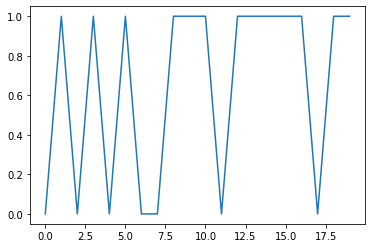

In [28]:
X=play(Strategie.CHANGER,20)
print(X)
plt.plot(X)

In [26]:
x=play(Strategie.GARDER,5)
print(x)

[0, 0, 0, 0, 0]


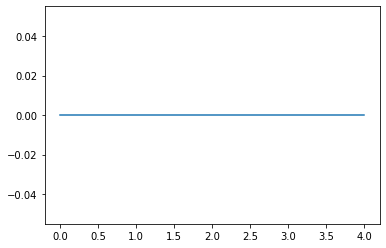

In [27]:
plt.plot(x)

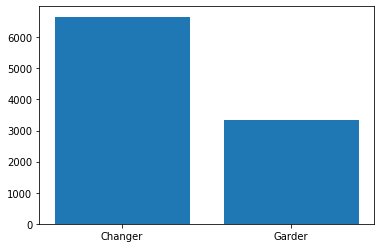

In [29]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

#TP2openclassroom prerequis

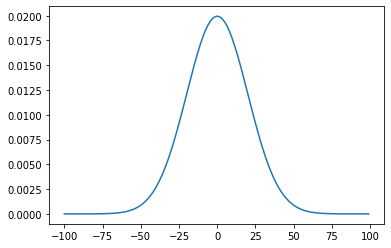

In [30]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 20

# Notez l'utilisation du mot clé lambda. Il est très bien expliqué dans le cours
# "Apprenez à programmer en Python" sur OpenClassrooms.
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)

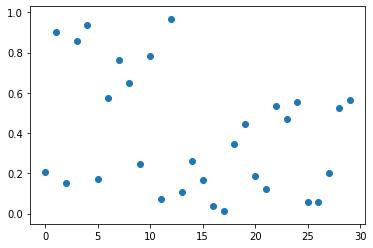

In [42]:
vecteur_aleatoire = np.random.rand(30)
plot = plt.scatter(range(30),vecteur_aleatoire)

In [ ]:
matrice_aleatoire_a_imprimer = np.random.rand(3,5)
print(matrice_aleatoire_a_imprimer)
matrice_aleatoire_a_grapher = np.random.rand(2,30)
fig = plt.figure()
plot1 = plt.scatter(range(30),matrice_aleatoire_a_grapher[0,:])
plot2 = plt.scatter(range(30),matrice_aleatoire_a_grapher[1,:])

In [ ]:
# Nous allons considérer 100 variables aléatoires, 
# chacune avec 200 échantillons.
 
sommes = np.sum(matrice_aleatoire,0)

In [ ]:
print("La taille de la variable sommes est {}.".format(sommes.shape))

In [ ]:
plot = plt.scatter(range(200), sommes)

In [ ]:
plot = plt.hist(sommes)

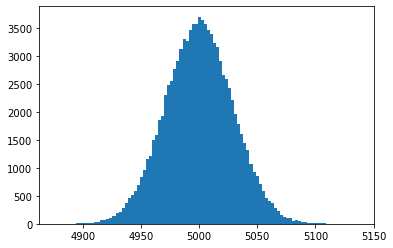

In [37]:
matrice_aleatoire = np.random.rand(10000,100000)
sommes = np.sum(matrice_aleatoire,0)
plot = plt.hist(sommes, bins=100)

In [38]:
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 4999.93400850338.
La moyenne empirique de la variable généré par la fonction rand est 0.5003073456973085.
La variance empirique de notre distribution est 835.7592607108543.
La variance empirique de la variable généré par la fonction rand est 0.08330287550437034.


In [43]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [57]:
x=np.random.normal([(3,7) for i in range(3)])


In [56]:
np.where(x > 0.5)

(array([0, 0, 1, 1, 2, 2], dtype=int64),
 array([0, 1, 0, 1, 0, 1], dtype=int64))

In [58]:
x

array([[3.54443089, 6.74407406],
       [3.25458365, 7.18245464],
       [2.82347252, 6.49696823]])

In [62]:
a = np.arange(3)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
b = np.arange(3)[:, np.newaxis]
b+a

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [63]:
np.linspace(0, 10, 50)


array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

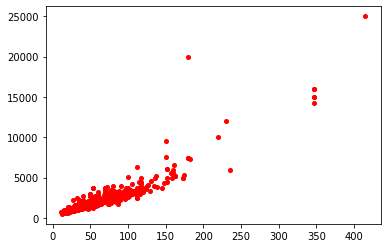

In [68]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house.csv')

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()


In [69]:
house_data = house_data[house_data['loyer'] < 10000]

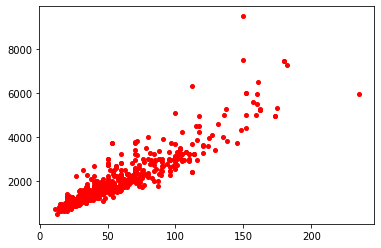

In [70]:
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

In [71]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].as_matrix()]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


C:\Users\sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [76]:
X.T

matrix([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [37., 32., 26., ..., 70., 42., 44.]])

# TP sur la modélisation du GAN

In [28]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [29]:
import os
import numpy as np
import errno
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
from IPython import display
from matplotlib import pyplot as plt
import torch

'''
    TensorBoard Data will be stored in './runs' path
'''


class Logger:

    def __init__(self, model_name, data_name):
        self.model_name = model_name
        self.data_name = data_name

        self.comment = '{}_{}'.format(model_name, data_name)
        self.data_subdir = '{}/{}'.format(model_name, data_name)

        # TensorBoard
        self.writer = SummaryWriter(comment=self.comment)

    def log(self, d_error, g_error, epoch, n_batch, num_batches):

        # var_class = torch.autograd.variable.Variable
        if isinstance(d_error, torch.autograd.Variable):
            d_error = d_error.data.cpu().numpy()
        if isinstance(g_error, torch.autograd.Variable):
            g_error = g_error.data.cpu().numpy()

        step = Logger._step(epoch, n_batch, num_batches)
        self.writer.add_scalar(
            '{}/D_error'.format(self.comment), d_error, step)
        self.writer.add_scalar(
            '{}/G_error'.format(self.comment), g_error, step)

    def log_images(self, images, num_images, epoch, n_batch, num_batches, format='NCHW', normalize=True):
        '''
        input images are expected in format (NCHW)
        '''
        if type(images) == np.ndarray:
            images = torch.from_numpy(images)
        
        if format=='NHWC':
            images = images.transpose(1,3)
        

        step = Logger._step(epoch, n_batch, num_batches)
        img_name = '{}/images{}'.format(self.comment, '')

        # Make horizontal grid from image tensor
        horizontal_grid = vutils.make_grid(
            images, normalize=normalize, scale_each=True)
        # Make vertical grid from image tensor
        nrows = int(np.sqrt(num_images))
        grid = vutils.make_grid(
            images, nrow=nrows, normalize=True, scale_each=True)

        # Add horizontal images to tensorboard
        self.writer.add_image(img_name, horizontal_grid, step)

        # Save plots
        self.save_torch_images(horizontal_grid, grid, epoch, n_batch)

    def save_torch_images(self, horizontal_grid, grid, epoch, n_batch, plot_horizontal=True):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)

        # Plot and save horizontal
        fig = plt.figure(figsize=(16, 16))
        plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
        plt.axis('off')
        if plot_horizontal:
            display.display(plt.gcf())
        self._save_images(fig, epoch, n_batch, 'hori')
        plt.close()

        # Save squared
        fig = plt.figure()
        plt.imshow(np.moveaxis(grid.numpy(), 0, -1))
        plt.axis('off')
        self._save_images(fig, epoch, n_batch)
        plt.close()

    def _save_images(self, fig, epoch, n_batch, comment=''):
        out_dir = './data/images/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)
        fig.savefig('{}/{}_epoch_{}_batch_{}.png'.format(out_dir,
                                                         comment, epoch, n_batch))

    def display_status(self, epoch, num_epochs, n_batch, num_batches, d_error, g_error, d_pred_real, d_pred_fake):
        
        # var_class = torch.autograd.variable.Variable
        if isinstance(d_error, torch.autograd.Variable):
            d_error = d_error.data.cpu().numpy()
        if isinstance(g_error, torch.autograd.Variable):
            g_error = g_error.data.cpu().numpy()
        if isinstance(d_pred_real, torch.autograd.Variable):
            d_pred_real = d_pred_real.data
        if isinstance(d_pred_fake, torch.autograd.Variable):
            d_pred_fake = d_pred_fake.data
        
        
        print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
            epoch,num_epochs, n_batch, num_batches)
             )
        print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
        print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))

    def save_models(self, generator, discriminator, epoch):
        out_dir = './data/models/{}'.format(self.data_subdir)
        Logger._make_dir(out_dir)
        torch.save(generator.state_dict(),
                   '{}/G_epoch_{}'.format(out_dir, epoch))
        torch.save(discriminator.state_dict(),
                   '{}/D_epoch_{}'.format(out_dir, epoch))

    def close(self):
        self.writer.close()

    # Private Functionality

    @staticmethod
    def _step(epoch, n_batch, num_batches):
        return epoch * num_batches + n_batch

    @staticmethod
    def _make_dir(directory):
        try:
            os.makedirs(directory)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

In [30]:
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
        #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=300, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [31]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [32]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [33]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [34]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [35]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [36]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [37]:
loss = nn.BCELoss()


In [38]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [39]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [40]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [41]:
num_test_samples = 16
test_noise = noise(num_test_samples)


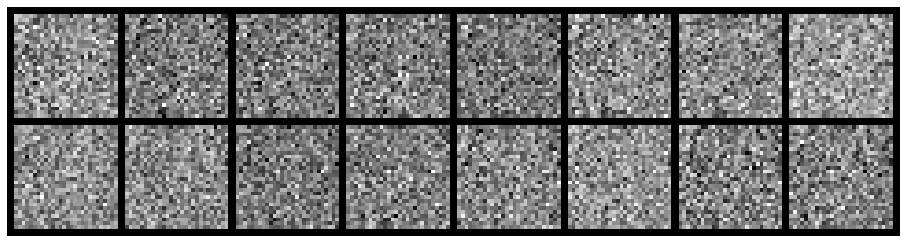

Epoch: [0/200], Batch Num: [0/200]
Discriminator Loss: 1.3923, Generator Loss: 0.7116
D(x): 0.4883, D(G(z)): 0.4910


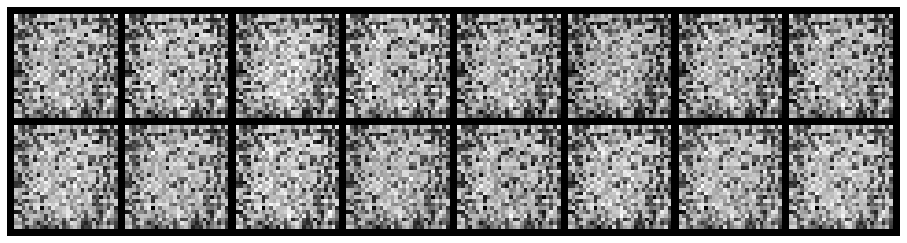

Epoch: [0/200], Batch Num: [100/200]
Discriminator Loss: 2.4167, Generator Loss: 0.7579
D(x): 0.2358, D(G(z)): 0.5777


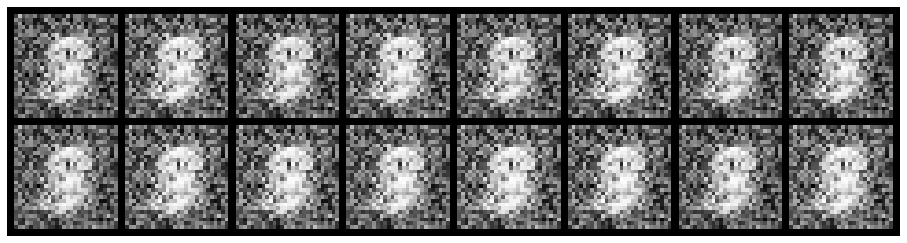

Epoch: [1/200], Batch Num: [0/200]
Discriminator Loss: 1.0834, Generator Loss: 1.6547
D(x): 0.4577, D(G(z)): 0.2574


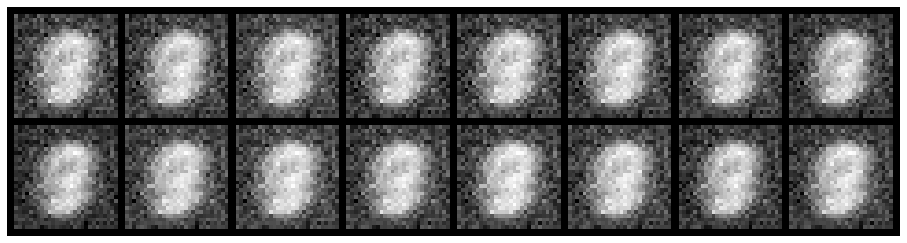

Epoch: [1/200], Batch Num: [100/200]
Discriminator Loss: 0.9543, Generator Loss: 0.9310
D(x): 0.6875, D(G(z)): 0.4349


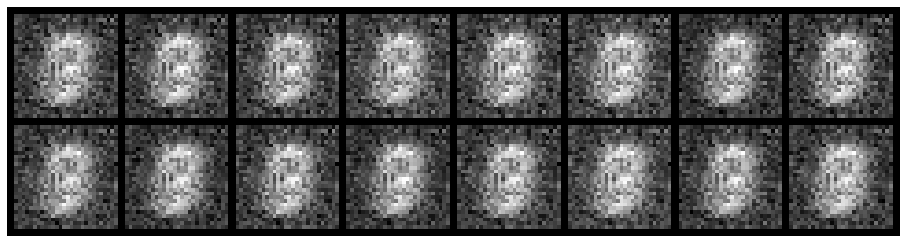

Epoch: [2/200], Batch Num: [0/200]
Discriminator Loss: 1.2959, Generator Loss: 0.5204
D(x): 0.6926, D(G(z)): 0.6028


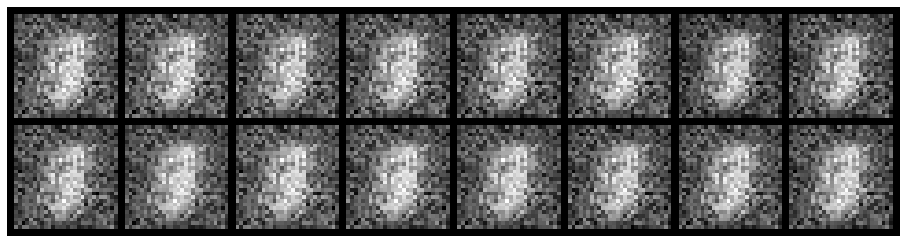

Epoch: [2/200], Batch Num: [100/200]
Discriminator Loss: 1.4336, Generator Loss: 0.6905
D(x): 0.4817, D(G(z)): 0.5021


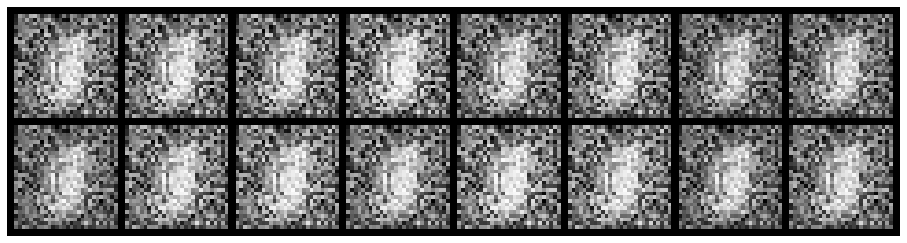

Epoch: [3/200], Batch Num: [0/200]
Discriminator Loss: 4.3497, Generator Loss: 1.8906
D(x): 0.1511, D(G(z)): 0.8123


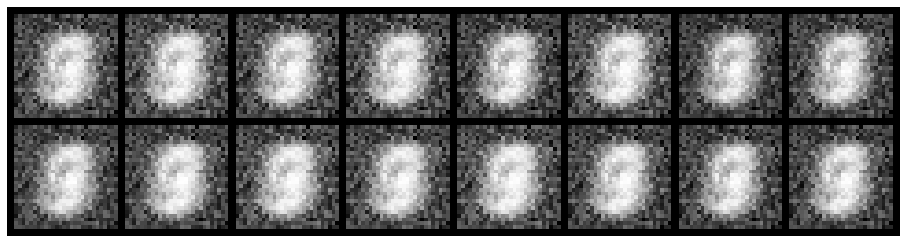

Epoch: [3/200], Batch Num: [100/200]
Discriminator Loss: 1.3073, Generator Loss: 1.4730
D(x): 0.3997, D(G(z)): 0.3110


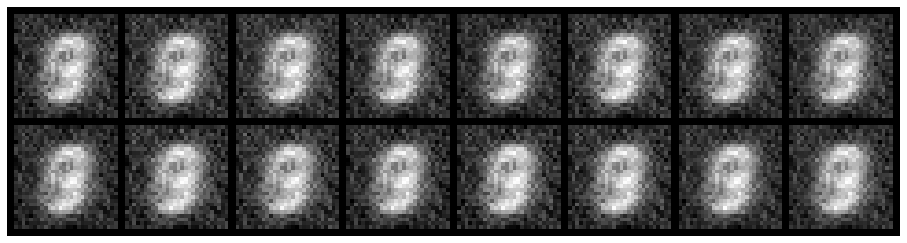

Epoch: [4/200], Batch Num: [0/200]
Discriminator Loss: 1.3570, Generator Loss: 0.7758
D(x): 0.5008, D(G(z)): 0.4790


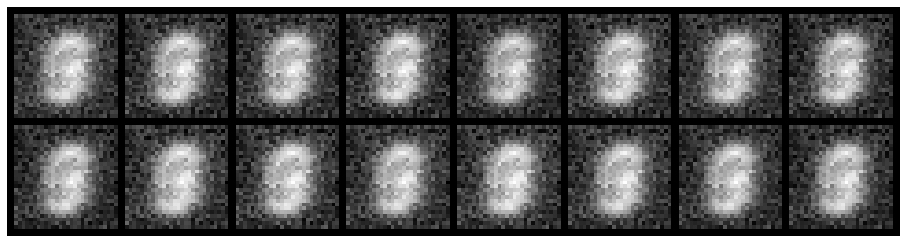

Epoch: [4/200], Batch Num: [100/200]
Discriminator Loss: 0.9366, Generator Loss: 1.6448
D(x): 0.6235, D(G(z)): 0.3633


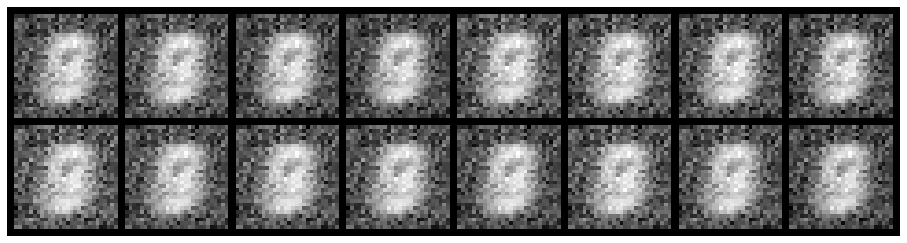

Epoch: [5/200], Batch Num: [0/200]
Discriminator Loss: 0.6497, Generator Loss: 2.1816
D(x): 0.7611, D(G(z)): 0.2885


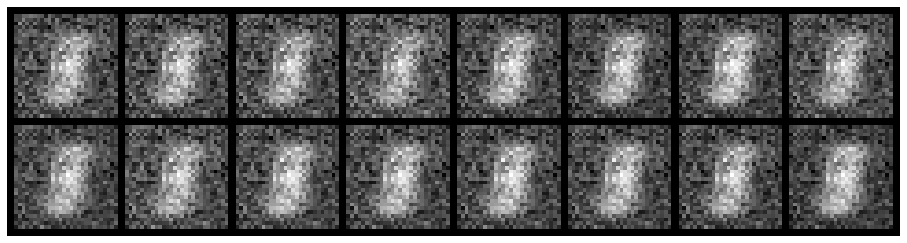

Epoch: [5/200], Batch Num: [100/200]
Discriminator Loss: 1.2683, Generator Loss: 1.3606
D(x): 0.6603, D(G(z)): 0.4124


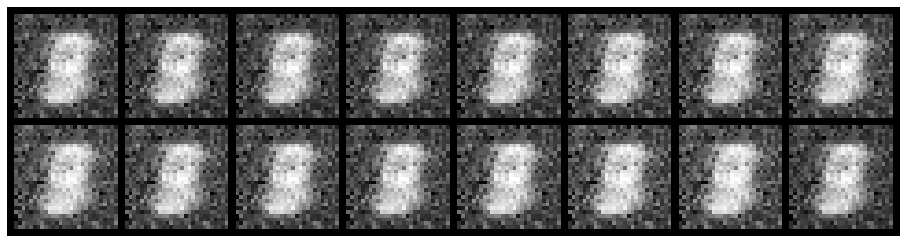

Epoch: [6/200], Batch Num: [0/200]
Discriminator Loss: 2.4177, Generator Loss: 0.5038
D(x): 0.3507, D(G(z)): 0.6260


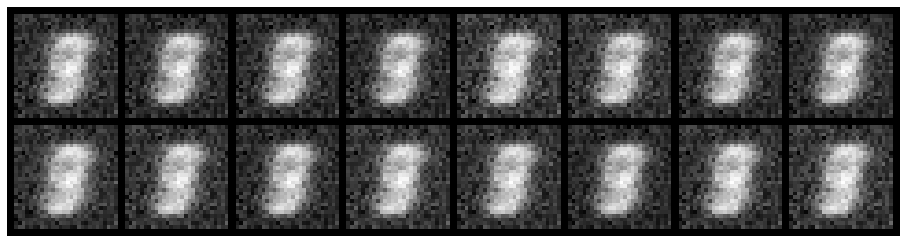

Epoch: [6/200], Batch Num: [100/200]
Discriminator Loss: 0.9212, Generator Loss: 1.0192
D(x): 0.7062, D(G(z)): 0.3931


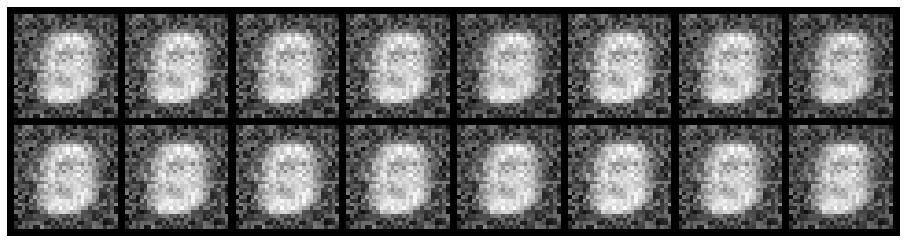

Epoch: [7/200], Batch Num: [0/200]
Discriminator Loss: 0.6008, Generator Loss: 1.8382
D(x): 0.7538, D(G(z)): 0.2159


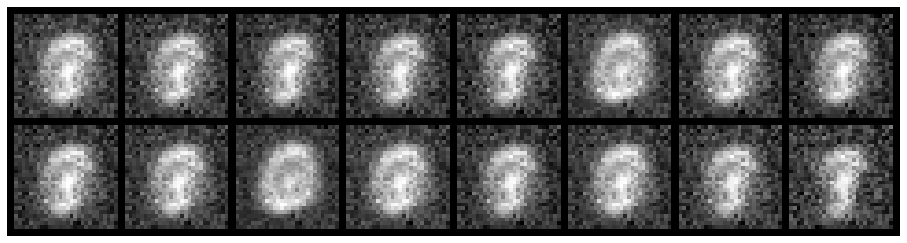

Epoch: [7/200], Batch Num: [100/200]
Discriminator Loss: 0.3844, Generator Loss: 2.2622
D(x): 0.8786, D(G(z)): 0.1585


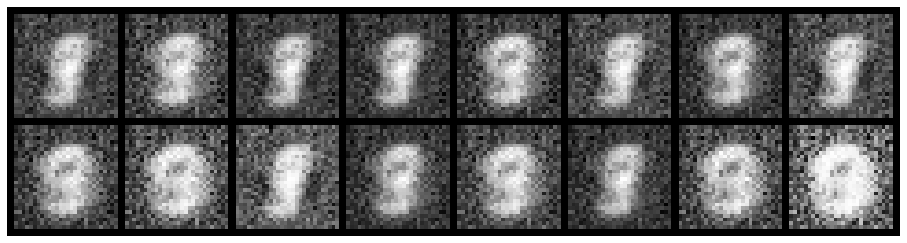

Epoch: [8/200], Batch Num: [0/200]
Discriminator Loss: 2.3864, Generator Loss: 1.5711
D(x): 0.3697, D(G(z)): 0.5374


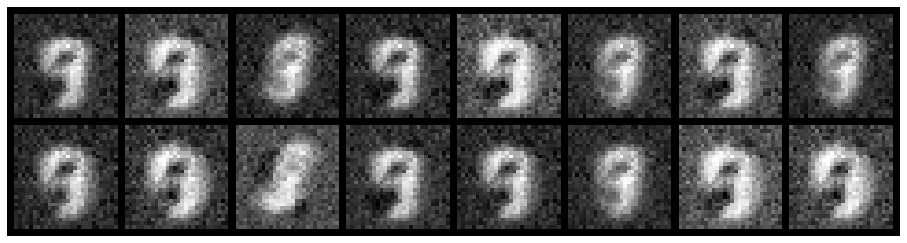

Epoch: [8/200], Batch Num: [100/200]
Discriminator Loss: 0.6269, Generator Loss: 1.9120
D(x): 0.8153, D(G(z)): 0.2501


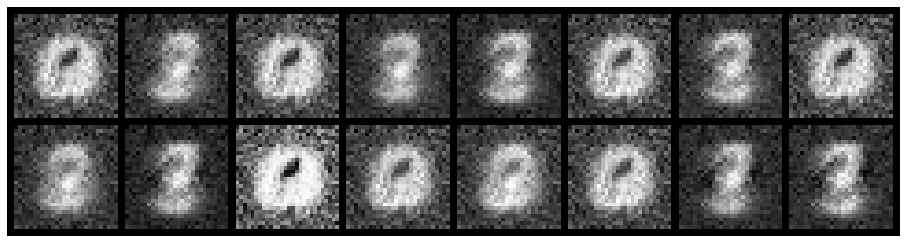

Epoch: [9/200], Batch Num: [0/200]
Discriminator Loss: 1.1432, Generator Loss: 1.5255
D(x): 0.6718, D(G(z)): 0.3463


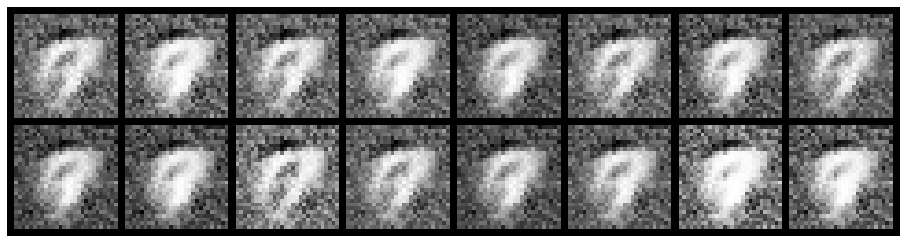

Epoch: [9/200], Batch Num: [100/200]
Discriminator Loss: 1.0017, Generator Loss: 2.5503
D(x): 0.5907, D(G(z)): 0.2532


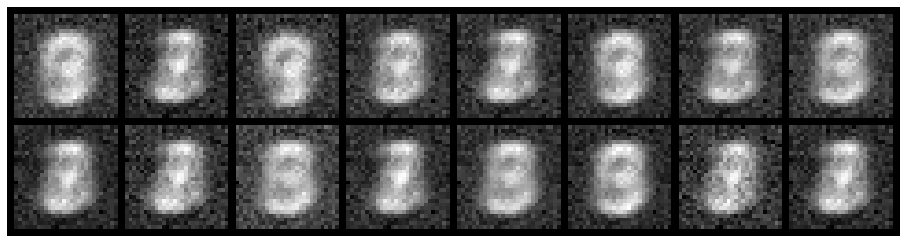

Epoch: [10/200], Batch Num: [0/200]
Discriminator Loss: 0.7725, Generator Loss: 1.7997
D(x): 0.7375, D(G(z)): 0.2337


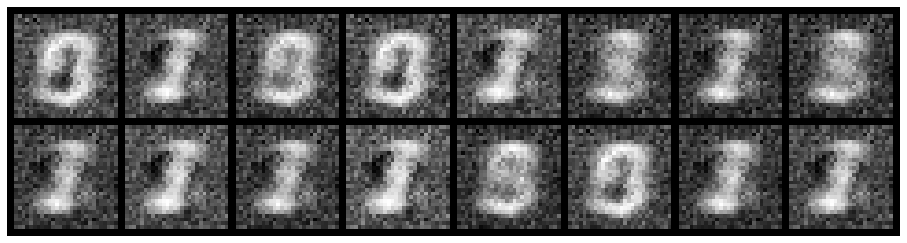

Epoch: [10/200], Batch Num: [100/200]
Discriminator Loss: 0.6082, Generator Loss: 1.8673
D(x): 0.8067, D(G(z)): 0.2403


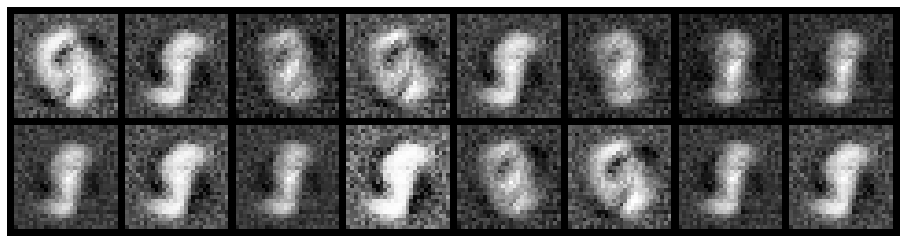

Epoch: [11/200], Batch Num: [0/200]
Discriminator Loss: 1.6950, Generator Loss: 1.8860
D(x): 0.5968, D(G(z)): 0.3585


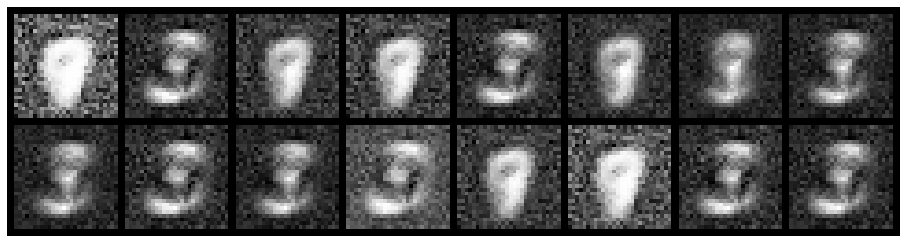

Epoch: [11/200], Batch Num: [100/200]
Discriminator Loss: 0.9269, Generator Loss: 1.1640
D(x): 0.7047, D(G(z)): 0.3516


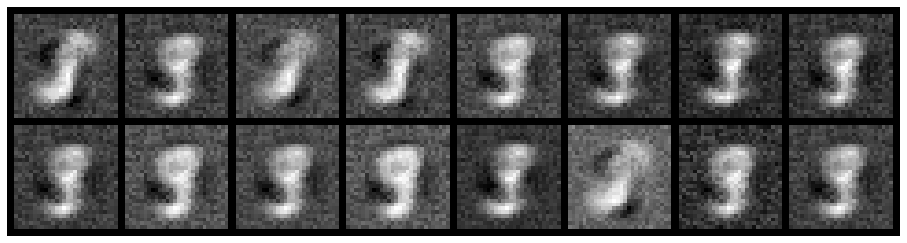

Epoch: [12/200], Batch Num: [0/200]
Discriminator Loss: 0.8906, Generator Loss: 1.0654
D(x): 0.7455, D(G(z)): 0.3780


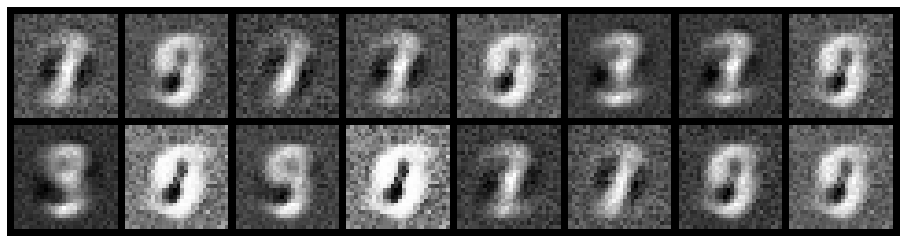

Epoch: [12/200], Batch Num: [100/200]
Discriminator Loss: 0.4027, Generator Loss: 1.9742
D(x): 0.9080, D(G(z)): 0.2168


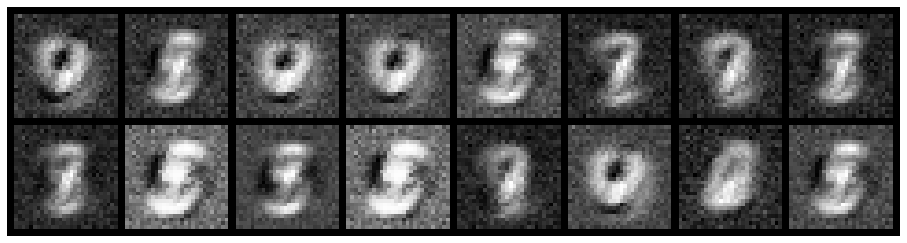

Epoch: [13/200], Batch Num: [0/200]
Discriminator Loss: 0.7287, Generator Loss: 1.4339
D(x): 0.7840, D(G(z)): 0.2911


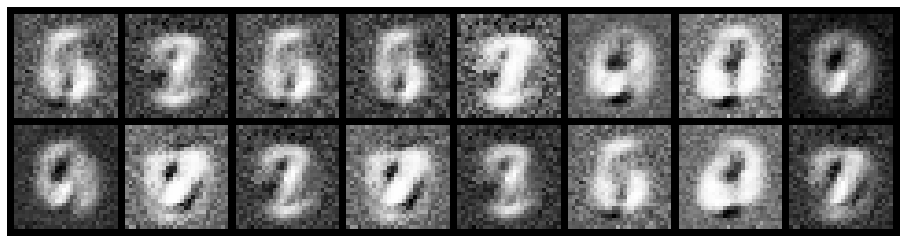

Epoch: [13/200], Batch Num: [100/200]
Discriminator Loss: 1.4277, Generator Loss: 1.7829
D(x): 0.4624, D(G(z)): 0.2659


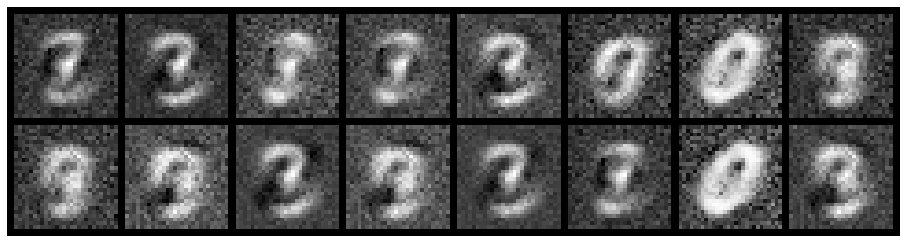

Epoch: [14/200], Batch Num: [0/200]
Discriminator Loss: 0.5113, Generator Loss: 1.5037
D(x): 0.8586, D(G(z)): 0.2619


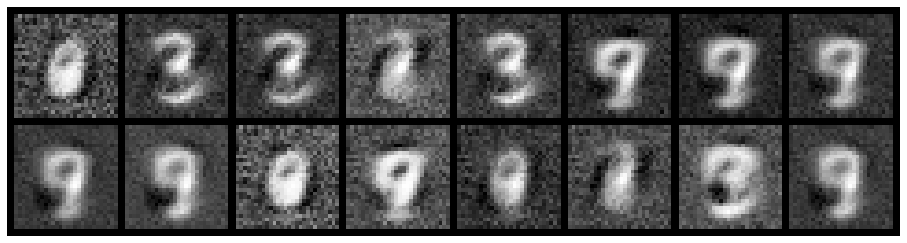

Epoch: [14/200], Batch Num: [100/200]
Discriminator Loss: 1.0482, Generator Loss: 1.1817
D(x): 0.6121, D(G(z)): 0.3616


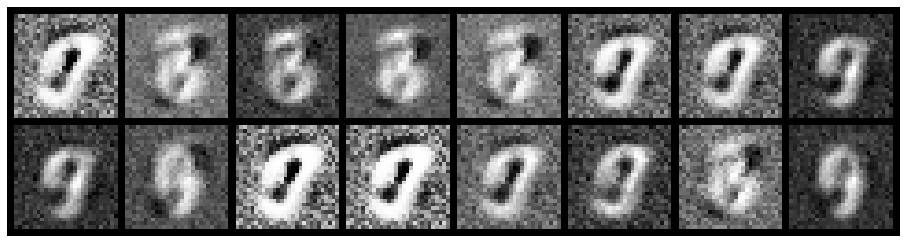

Epoch: [15/200], Batch Num: [0/200]
Discriminator Loss: 0.7867, Generator Loss: 2.6721
D(x): 0.8101, D(G(z)): 0.2686


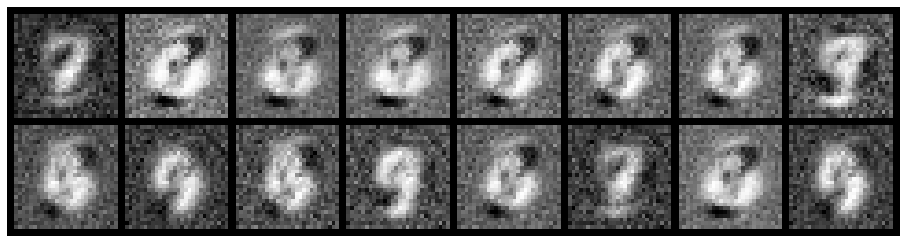

Epoch: [15/200], Batch Num: [100/200]
Discriminator Loss: 0.7713, Generator Loss: 1.4895
D(x): 0.7675, D(G(z)): 0.3218


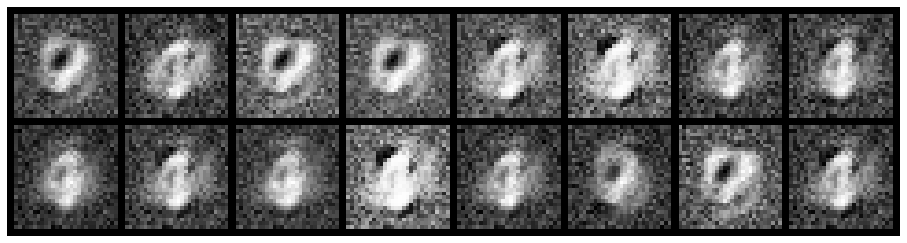

Epoch: [16/200], Batch Num: [0/200]
Discriminator Loss: 1.1254, Generator Loss: 1.6646
D(x): 0.6614, D(G(z)): 0.2967


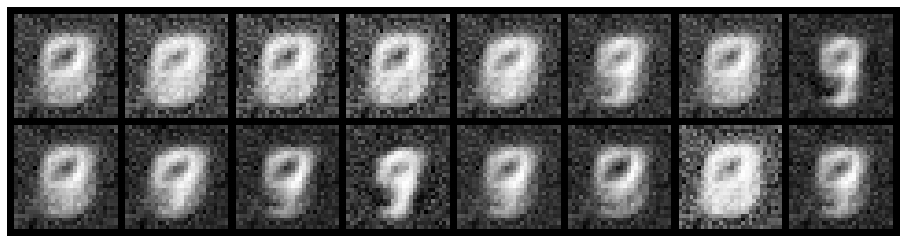

Epoch: [16/200], Batch Num: [100/200]
Discriminator Loss: 1.0601, Generator Loss: 1.6326
D(x): 0.6583, D(G(z)): 0.3281


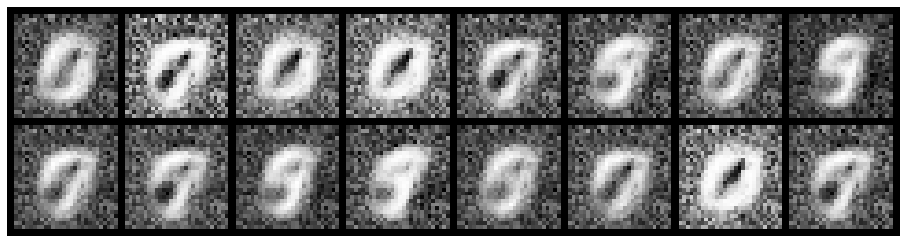

Epoch: [17/200], Batch Num: [0/200]
Discriminator Loss: 1.1816, Generator Loss: 1.9143
D(x): 0.6055, D(G(z)): 0.2680


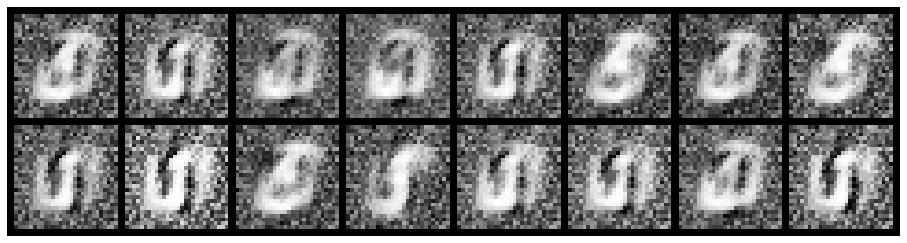

Epoch: [17/200], Batch Num: [100/200]
Discriminator Loss: 1.3030, Generator Loss: 2.0535
D(x): 0.5379, D(G(z)): 0.2932


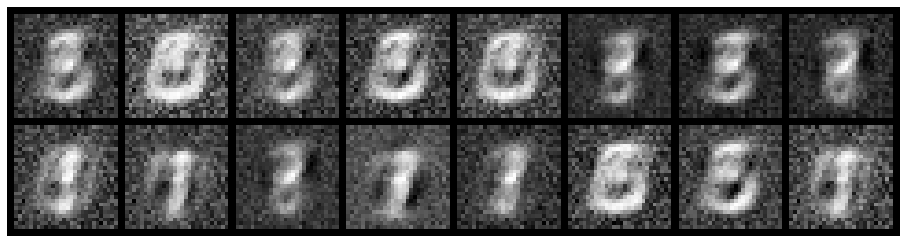

Epoch: [18/200], Batch Num: [0/200]
Discriminator Loss: 0.6073, Generator Loss: 1.6396
D(x): 0.8431, D(G(z)): 0.3112


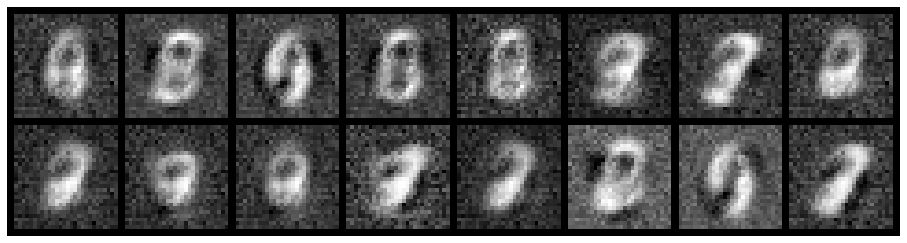

Epoch: [18/200], Batch Num: [100/200]
Discriminator Loss: 0.7358, Generator Loss: 1.8474
D(x): 0.7846, D(G(z)): 0.2639


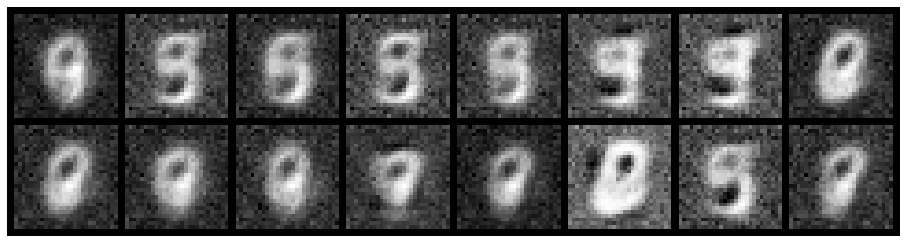

Epoch: [19/200], Batch Num: [0/200]
Discriminator Loss: 0.8929, Generator Loss: 1.7041
D(x): 0.6878, D(G(z)): 0.2740


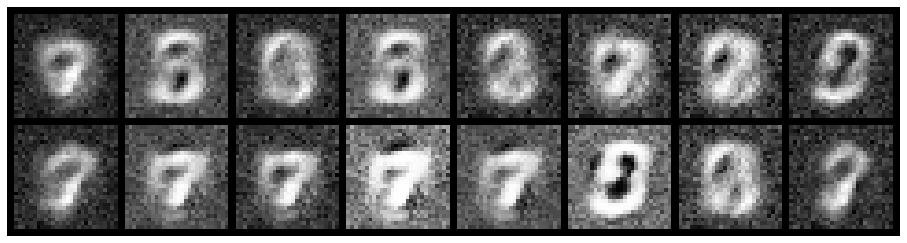

Epoch: [19/200], Batch Num: [100/200]
Discriminator Loss: 0.9616, Generator Loss: 1.5149
D(x): 0.7088, D(G(z)): 0.3098


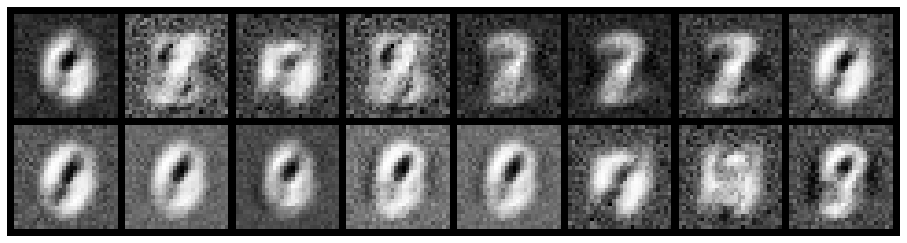

Epoch: [20/200], Batch Num: [0/200]
Discriminator Loss: 0.7687, Generator Loss: 2.1033
D(x): 0.7598, D(G(z)): 0.2386


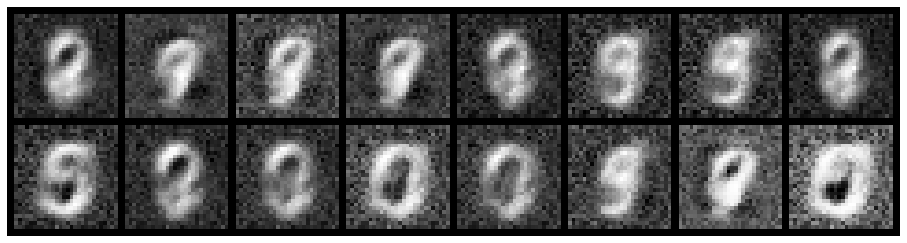

Epoch: [20/200], Batch Num: [100/200]
Discriminator Loss: 1.7015, Generator Loss: 1.8740
D(x): 0.5049, D(G(z)): 0.2980


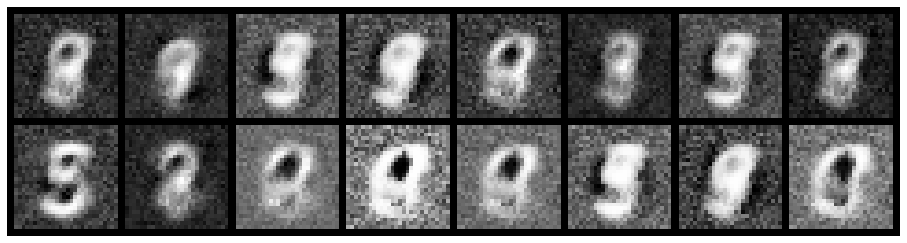

Epoch: [21/200], Batch Num: [0/200]
Discriminator Loss: 1.4220, Generator Loss: 1.3022
D(x): 0.5494, D(G(z)): 0.3658


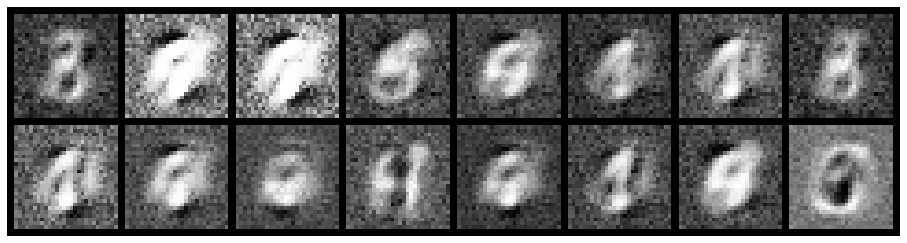

Epoch: [21/200], Batch Num: [100/200]
Discriminator Loss: 0.5546, Generator Loss: 2.9277
D(x): 0.7868, D(G(z)): 0.1729


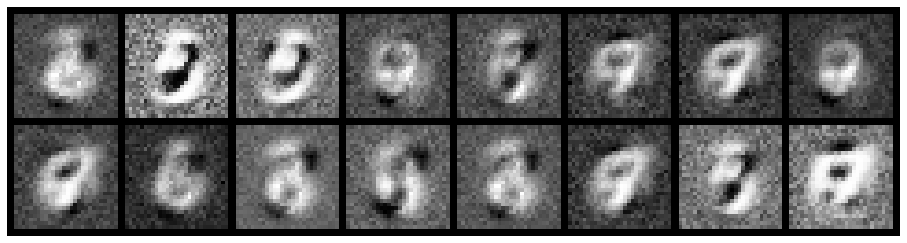

Epoch: [22/200], Batch Num: [0/200]
Discriminator Loss: 0.9120, Generator Loss: 1.3390
D(x): 0.7287, D(G(z)): 0.3524


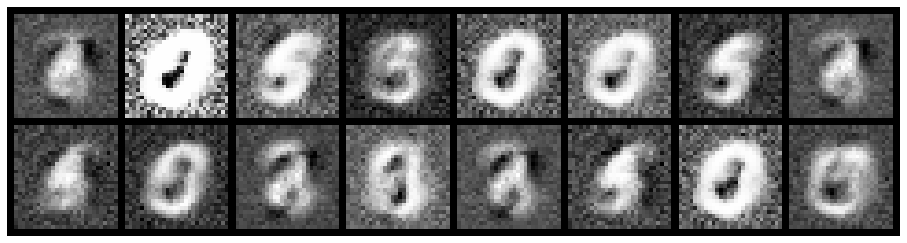

Epoch: [22/200], Batch Num: [100/200]
Discriminator Loss: 1.2180, Generator Loss: 1.6544
D(x): 0.5946, D(G(z)): 0.3042


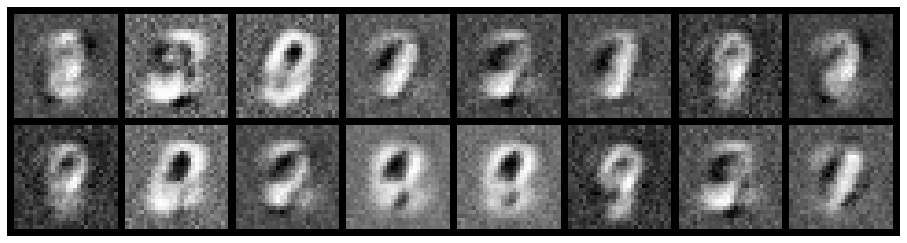

Epoch: [23/200], Batch Num: [0/200]
Discriminator Loss: 1.2536, Generator Loss: 1.4566
D(x): 0.6491, D(G(z)): 0.3659


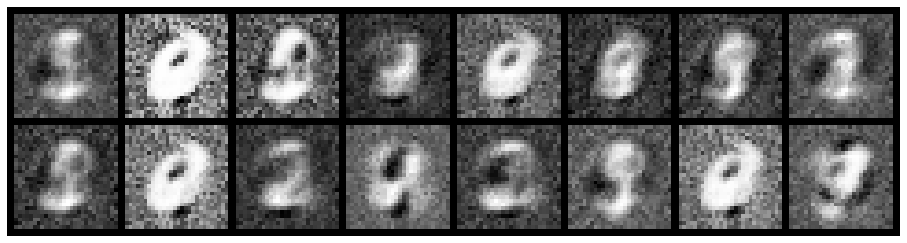

Epoch: [23/200], Batch Num: [100/200]
Discriminator Loss: 0.9468, Generator Loss: 1.6015
D(x): 0.6965, D(G(z)): 0.3135


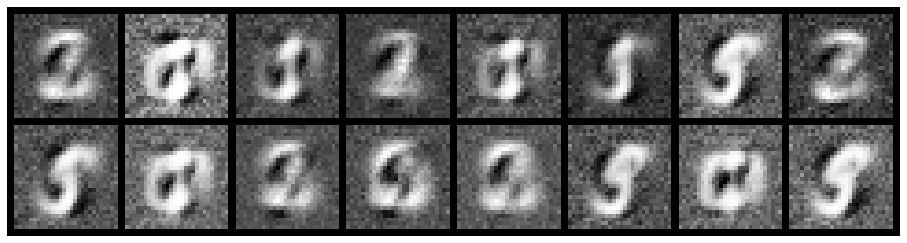

Epoch: [24/200], Batch Num: [0/200]
Discriminator Loss: 0.9803, Generator Loss: 1.5810
D(x): 0.6987, D(G(z)): 0.3070


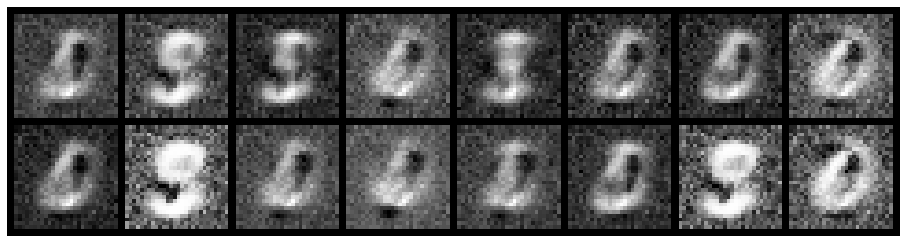

Epoch: [24/200], Batch Num: [100/200]
Discriminator Loss: 0.4915, Generator Loss: 1.8089
D(x): 0.8556, D(G(z)): 0.2292


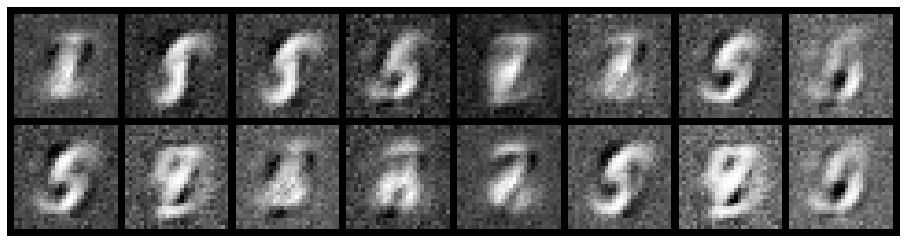

Epoch: [25/200], Batch Num: [0/200]
Discriminator Loss: 0.9287, Generator Loss: 1.5949
D(x): 0.7111, D(G(z)): 0.3026


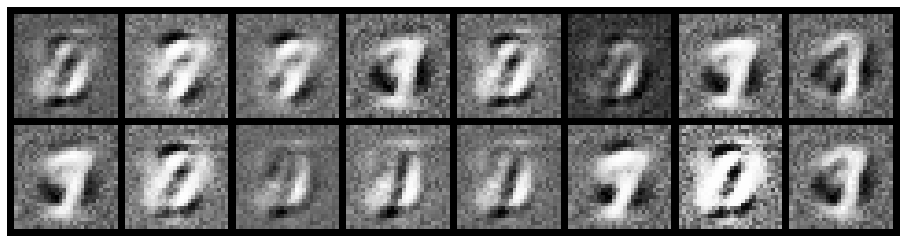

Epoch: [25/200], Batch Num: [100/200]
Discriminator Loss: 0.4387, Generator Loss: 2.1642
D(x): 0.8535, D(G(z)): 0.1992


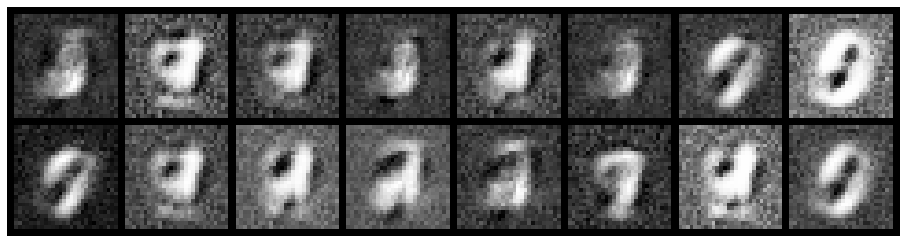

Epoch: [26/200], Batch Num: [0/200]
Discriminator Loss: 0.9880, Generator Loss: 1.7683
D(x): 0.6700, D(G(z)): 0.2560


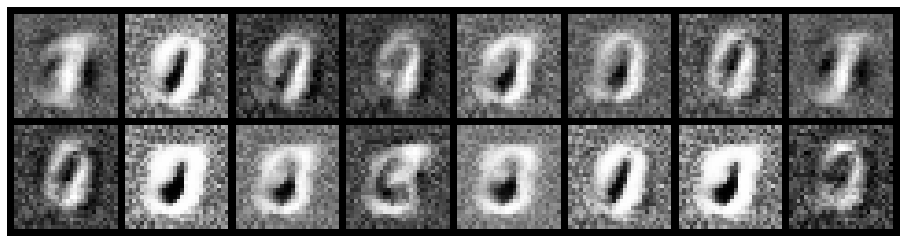

Epoch: [26/200], Batch Num: [100/200]
Discriminator Loss: 0.8547, Generator Loss: 1.8502
D(x): 0.7216, D(G(z)): 0.2719


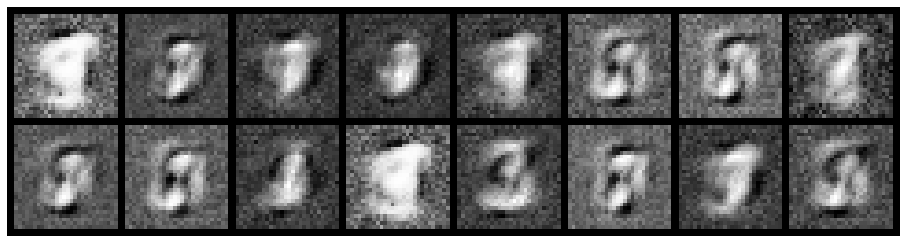

Epoch: [27/200], Batch Num: [0/200]
Discriminator Loss: 0.7404, Generator Loss: 1.4711
D(x): 0.7654, D(G(z)): 0.2909


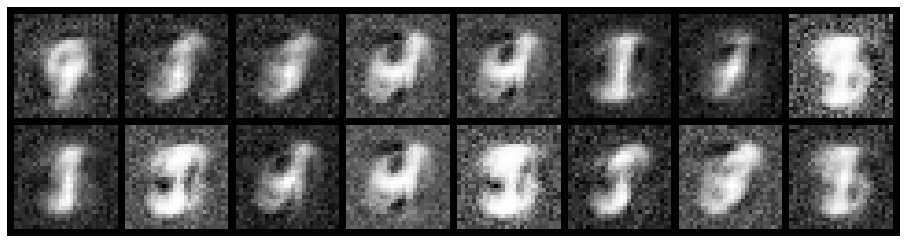

Epoch: [27/200], Batch Num: [100/200]
Discriminator Loss: 1.1563, Generator Loss: 1.9978
D(x): 0.6481, D(G(z)): 0.2807


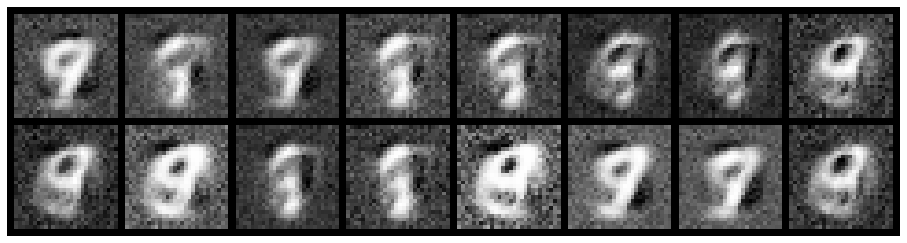

Epoch: [28/200], Batch Num: [0/200]
Discriminator Loss: 1.0941, Generator Loss: 1.1708
D(x): 0.6103, D(G(z)): 0.3785


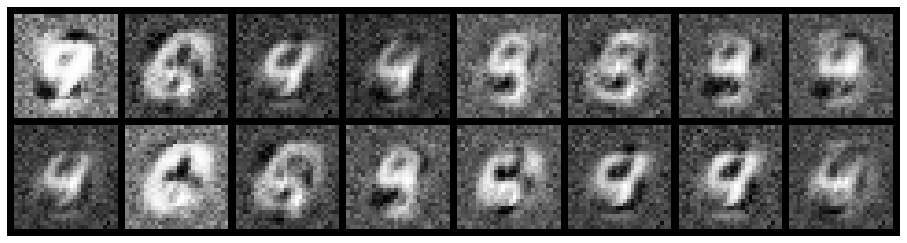

Epoch: [28/200], Batch Num: [100/200]
Discriminator Loss: 0.9572, Generator Loss: 2.3754
D(x): 0.7479, D(G(z)): 0.2476


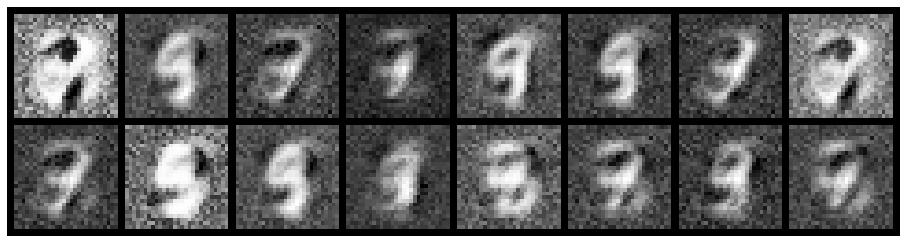

Epoch: [29/200], Batch Num: [0/200]
Discriminator Loss: 0.9525, Generator Loss: 1.1433
D(x): 0.6677, D(G(z)): 0.3805


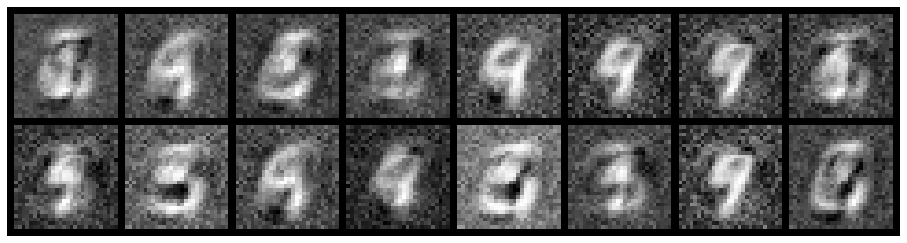

Epoch: [29/200], Batch Num: [100/200]
Discriminator Loss: 1.0854, Generator Loss: 1.3729
D(x): 0.7024, D(G(z)): 0.4047


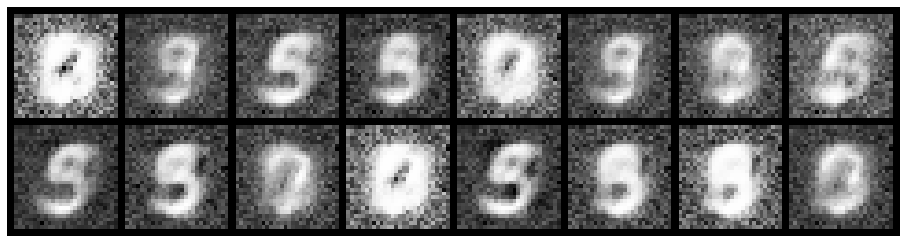

Epoch: [30/200], Batch Num: [0/200]
Discriminator Loss: 0.8456, Generator Loss: 2.2717
D(x): 0.6919, D(G(z)): 0.1777


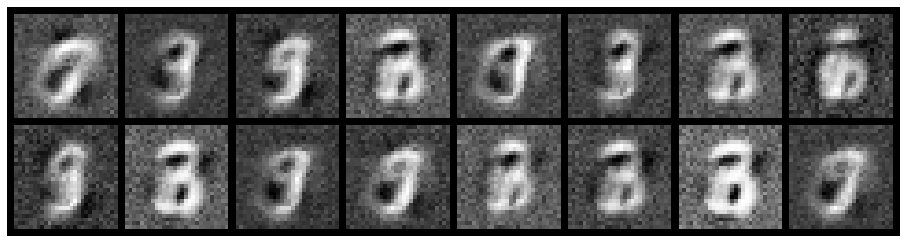

Epoch: [30/200], Batch Num: [100/200]
Discriminator Loss: 1.5250, Generator Loss: 1.4321
D(x): 0.5867, D(G(z)): 0.3527


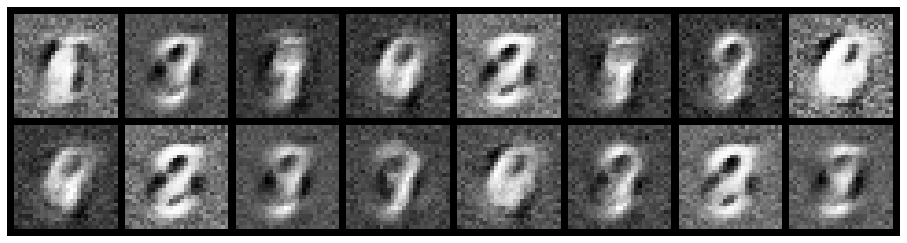

Epoch: [31/200], Batch Num: [0/200]
Discriminator Loss: 1.0186, Generator Loss: 1.2997
D(x): 0.6327, D(G(z)): 0.3419


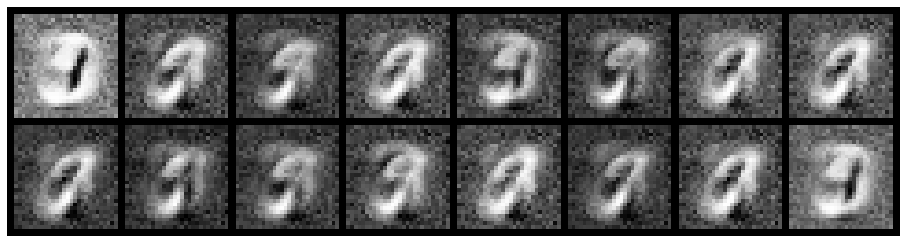

Epoch: [31/200], Batch Num: [100/200]
Discriminator Loss: 0.3460, Generator Loss: 2.8118
D(x): 0.8789, D(G(z)): 0.1248


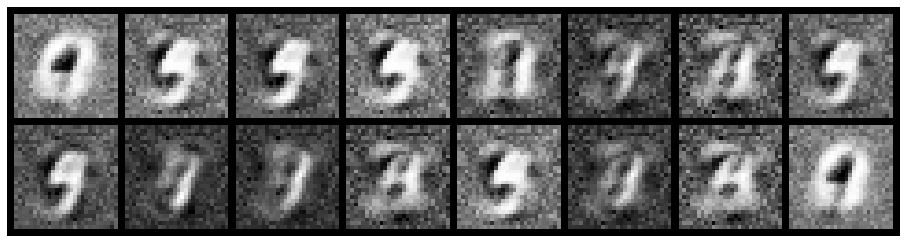

Epoch: [32/200], Batch Num: [0/200]
Discriminator Loss: 0.8938, Generator Loss: 1.4983
D(x): 0.7143, D(G(z)): 0.3362


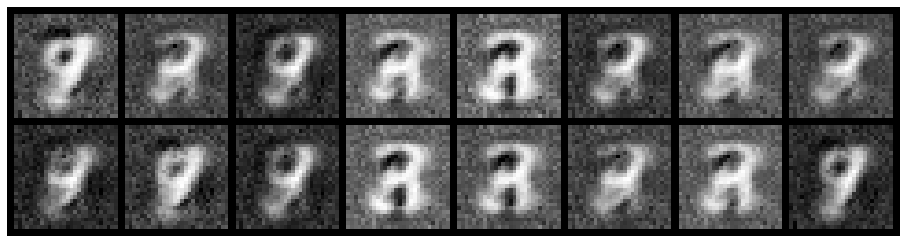

Epoch: [32/200], Batch Num: [100/200]
Discriminator Loss: 0.5406, Generator Loss: 1.9185
D(x): 0.8303, D(G(z)): 0.2270


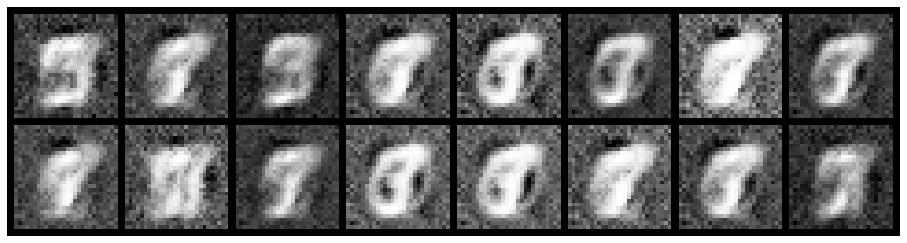

Epoch: [33/200], Batch Num: [0/200]
Discriminator Loss: 0.8020, Generator Loss: 1.6918
D(x): 0.6805, D(G(z)): 0.2433


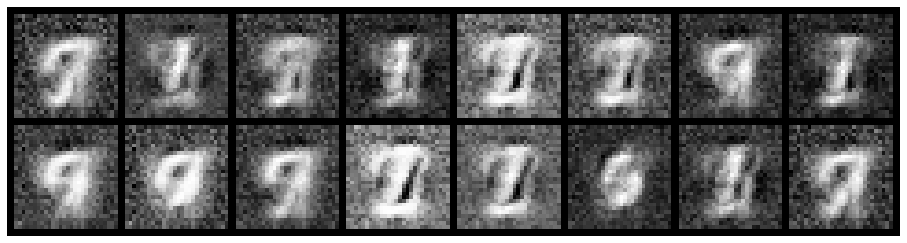

Epoch: [33/200], Batch Num: [100/200]
Discriminator Loss: 1.1811, Generator Loss: 1.6623
D(x): 0.5971, D(G(z)): 0.2878


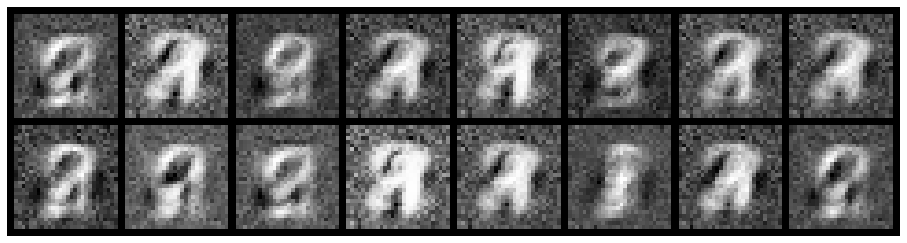

Epoch: [34/200], Batch Num: [0/200]
Discriminator Loss: 1.0106, Generator Loss: 1.7971
D(x): 0.7016, D(G(z)): 0.3089


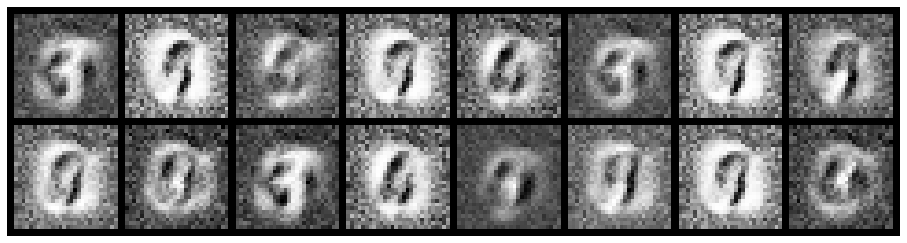

Epoch: [34/200], Batch Num: [100/200]
Discriminator Loss: 1.2274, Generator Loss: 1.1884
D(x): 0.6882, D(G(z)): 0.4633


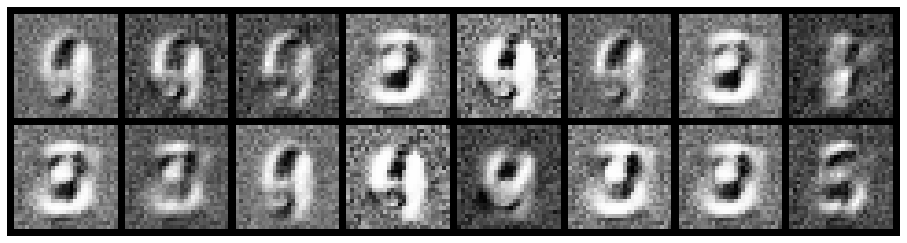

Epoch: [35/200], Batch Num: [0/200]
Discriminator Loss: 0.7019, Generator Loss: 2.1187
D(x): 0.8196, D(G(z)): 0.2596


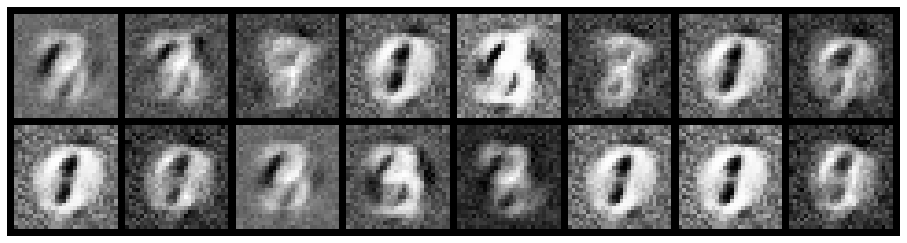

Epoch: [35/200], Batch Num: [100/200]
Discriminator Loss: 1.0737, Generator Loss: 2.3404
D(x): 0.7050, D(G(z)): 0.2592


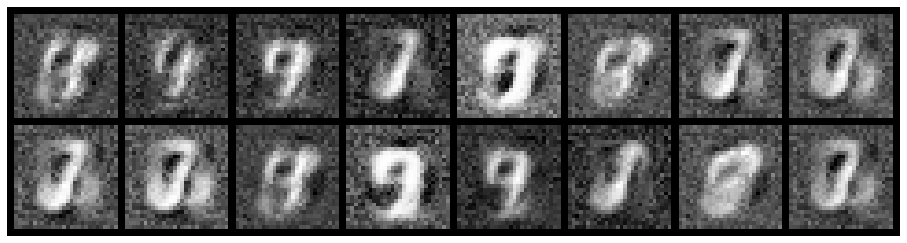

Epoch: [36/200], Batch Num: [0/200]
Discriminator Loss: 0.9789, Generator Loss: 1.8605
D(x): 0.6974, D(G(z)): 0.2727


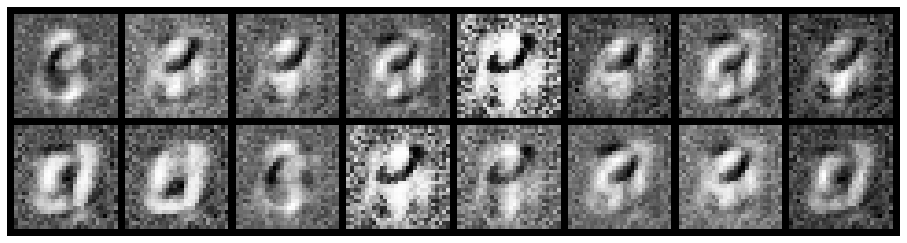

Epoch: [36/200], Batch Num: [100/200]
Discriminator Loss: 0.8942, Generator Loss: 1.2718
D(x): 0.7149, D(G(z)): 0.3378


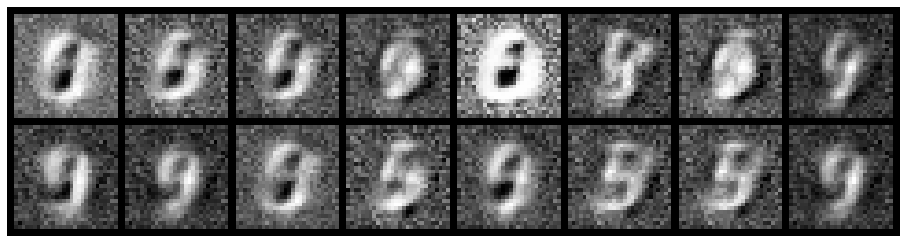

Epoch: [37/200], Batch Num: [0/200]
Discriminator Loss: 0.6336, Generator Loss: 2.2549
D(x): 0.8194, D(G(z)): 0.2108


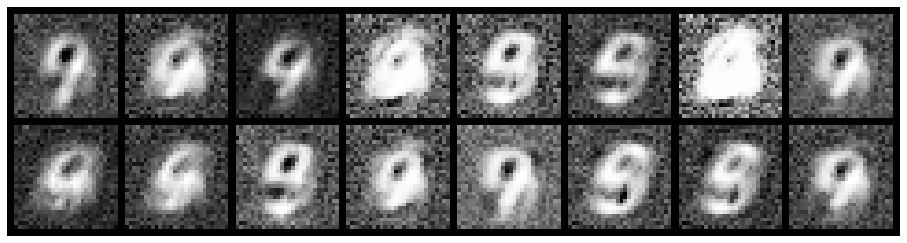

Epoch: [37/200], Batch Num: [100/200]
Discriminator Loss: 0.8321, Generator Loss: 1.9193
D(x): 0.6231, D(G(z)): 0.2040


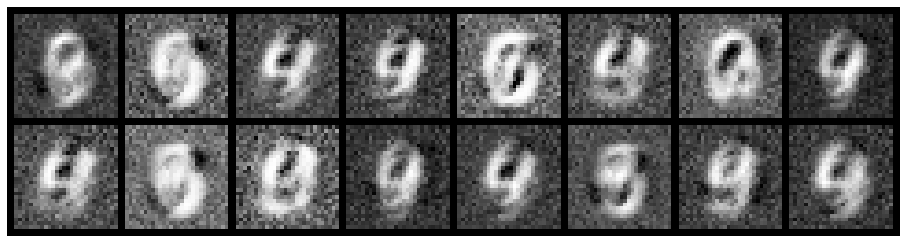

Epoch: [38/200], Batch Num: [0/200]
Discriminator Loss: 1.4044, Generator Loss: 1.9233
D(x): 0.6536, D(G(z)): 0.3392


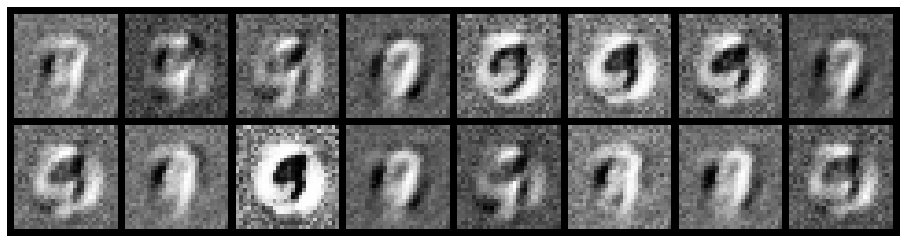

Epoch: [38/200], Batch Num: [100/200]
Discriminator Loss: 0.4859, Generator Loss: 1.8041
D(x): 0.8984, D(G(z)): 0.2722


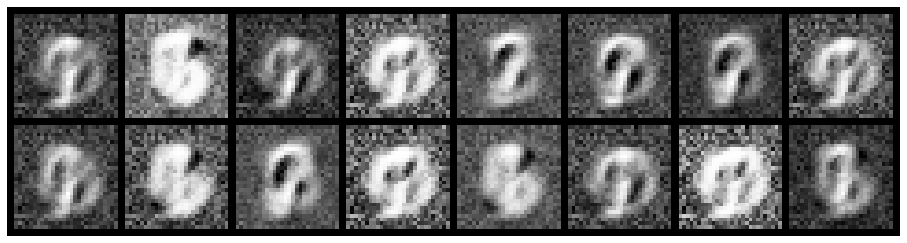

Epoch: [39/200], Batch Num: [0/200]
Discriminator Loss: 0.9173, Generator Loss: 1.4660
D(x): 0.6933, D(G(z)): 0.3133


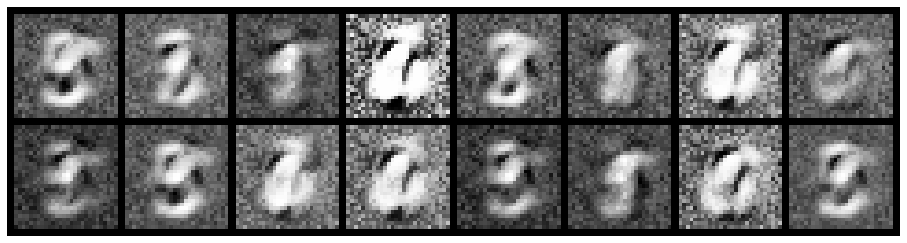

Epoch: [39/200], Batch Num: [100/200]
Discriminator Loss: 0.6937, Generator Loss: 1.9325
D(x): 0.8381, D(G(z)): 0.2885


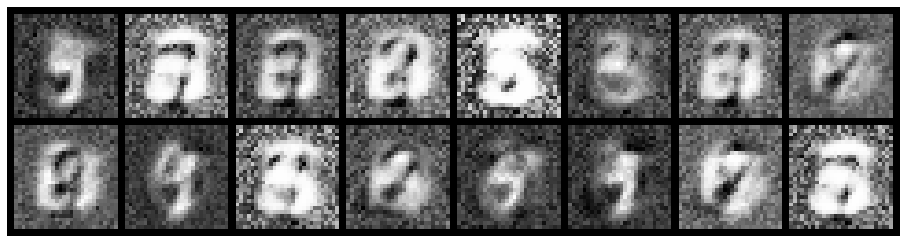

Epoch: [40/200], Batch Num: [0/200]
Discriminator Loss: 1.4972, Generator Loss: 1.1476
D(x): 0.4447, D(G(z)): 0.3715


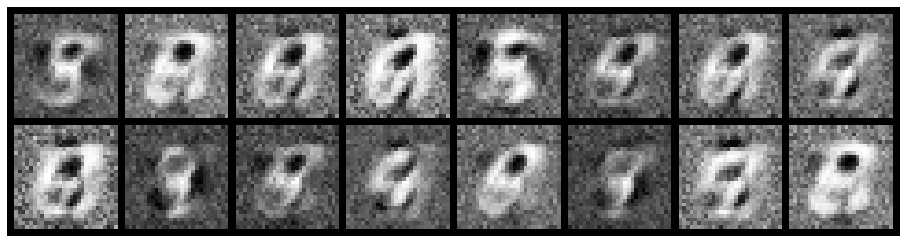

Epoch: [40/200], Batch Num: [100/200]
Discriminator Loss: 0.6432, Generator Loss: 2.0128
D(x): 0.8815, D(G(z)): 0.3040


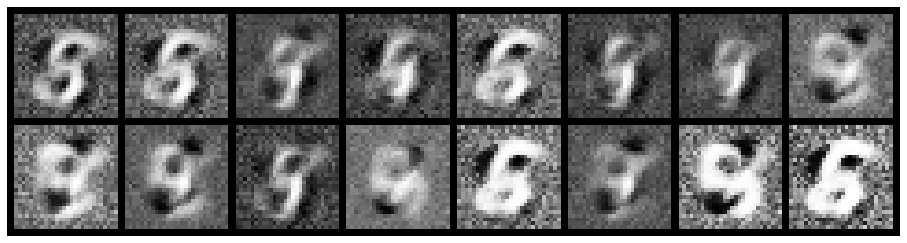

Epoch: [41/200], Batch Num: [0/200]
Discriminator Loss: 1.1450, Generator Loss: 1.6330
D(x): 0.6844, D(G(z)): 0.3485


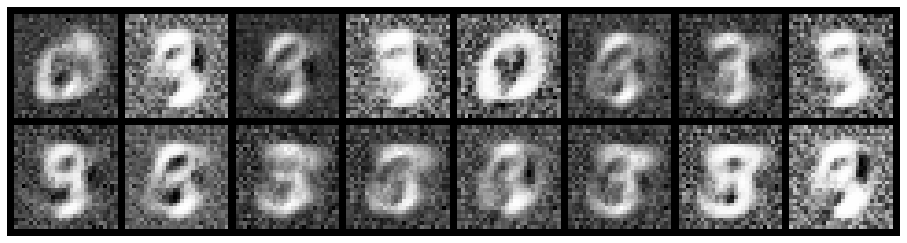

Epoch: [41/200], Batch Num: [100/200]
Discriminator Loss: 0.9640, Generator Loss: 1.8566
D(x): 0.7043, D(G(z)): 0.2991


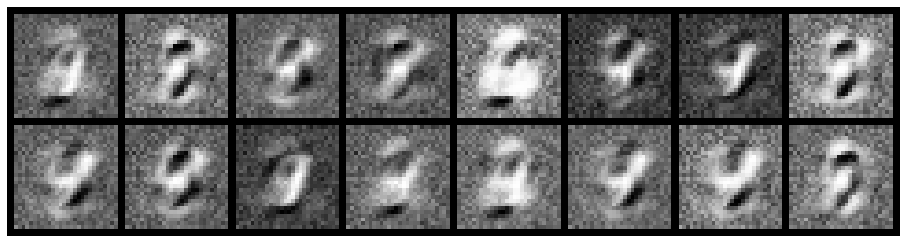

Epoch: [42/200], Batch Num: [0/200]
Discriminator Loss: 0.7828, Generator Loss: 1.5208
D(x): 0.8411, D(G(z)): 0.3519


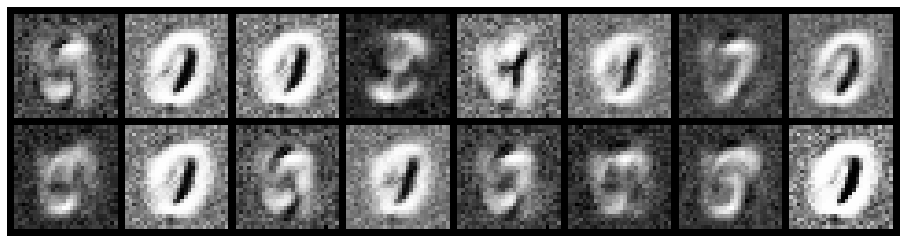

Epoch: [42/200], Batch Num: [100/200]
Discriminator Loss: 0.9249, Generator Loss: 1.9363
D(x): 0.6667, D(G(z)): 0.2741


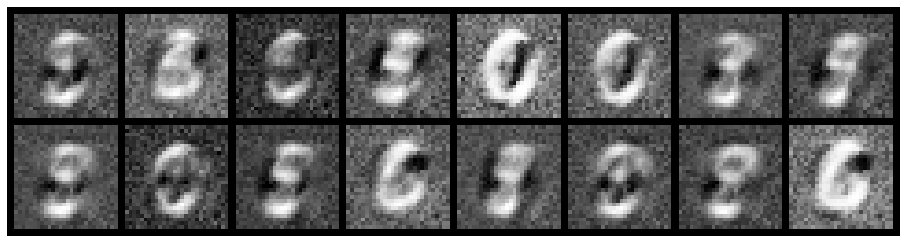

Epoch: [43/200], Batch Num: [0/200]
Discriminator Loss: 1.3362, Generator Loss: 1.7025
D(x): 0.6322, D(G(z)): 0.3459


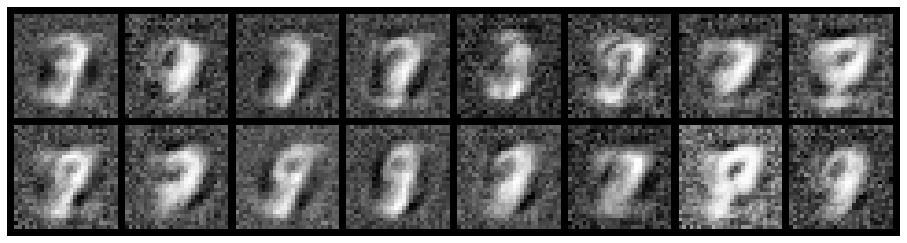

Epoch: [43/200], Batch Num: [100/200]
Discriminator Loss: 1.2238, Generator Loss: 0.9741
D(x): 0.6802, D(G(z)): 0.4854


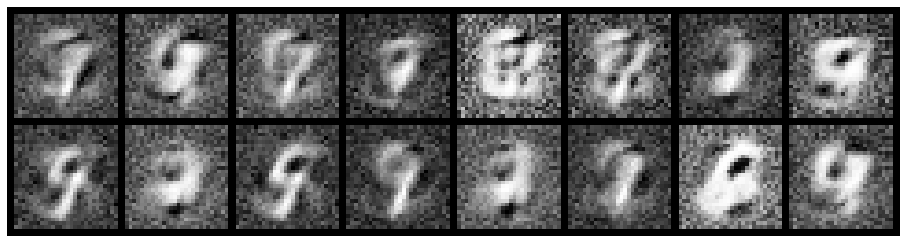

Epoch: [44/200], Batch Num: [0/200]
Discriminator Loss: 0.9043, Generator Loss: 1.7226
D(x): 0.7111, D(G(z)): 0.2972


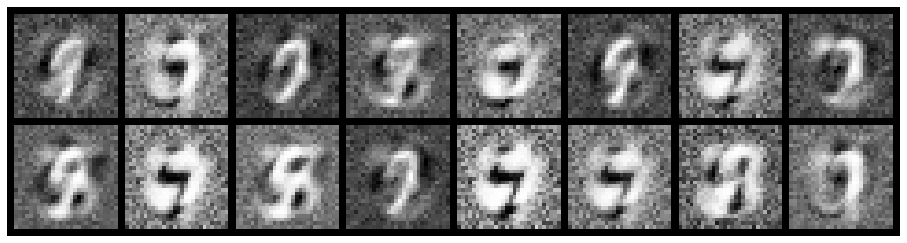

Epoch: [44/200], Batch Num: [100/200]
Discriminator Loss: 1.0866, Generator Loss: 1.7466
D(x): 0.6831, D(G(z)): 0.2760


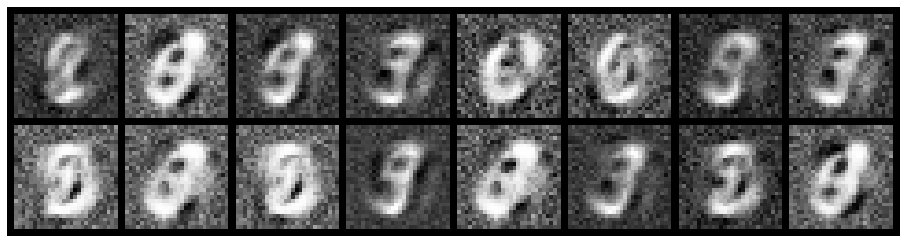

Epoch: [45/200], Batch Num: [0/200]
Discriminator Loss: 1.0862, Generator Loss: 1.0446
D(x): 0.6415, D(G(z)): 0.4005


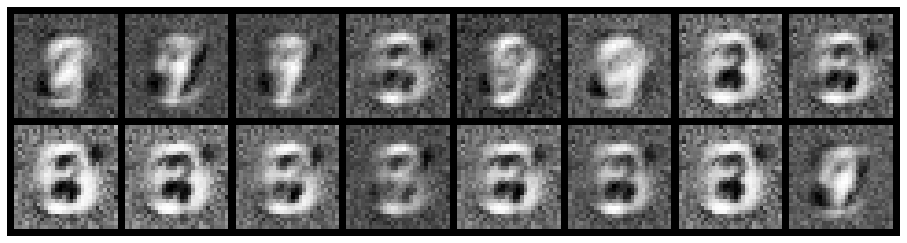

Epoch: [45/200], Batch Num: [100/200]
Discriminator Loss: 1.3463, Generator Loss: 3.8693
D(x): 0.6936, D(G(z)): 0.1969


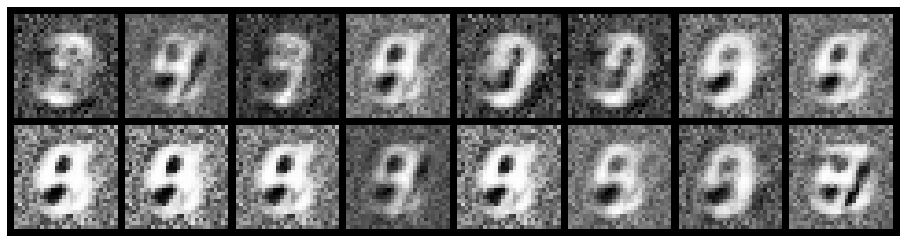

Epoch: [46/200], Batch Num: [0/200]
Discriminator Loss: 0.8713, Generator Loss: 1.5693
D(x): 0.7037, D(G(z)): 0.3018


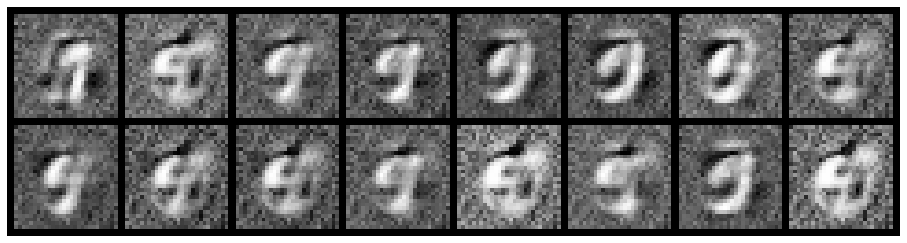

Epoch: [46/200], Batch Num: [100/200]
Discriminator Loss: 1.0284, Generator Loss: 1.4219
D(x): 0.7103, D(G(z)): 0.3765


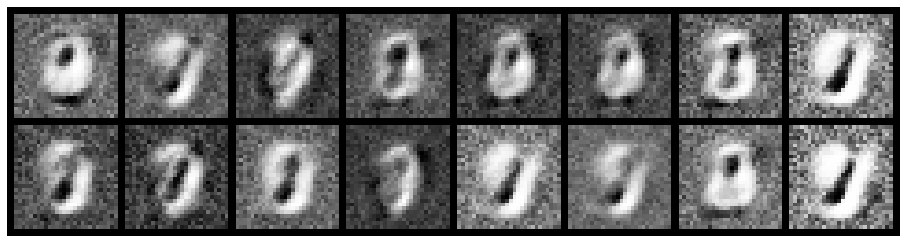

Epoch: [47/200], Batch Num: [0/200]
Discriminator Loss: 1.1482, Generator Loss: 1.6692
D(x): 0.6209, D(G(z)): 0.2832


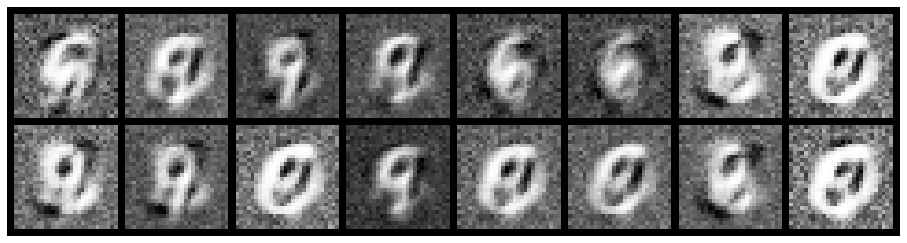

Epoch: [47/200], Batch Num: [100/200]
Discriminator Loss: 0.7753, Generator Loss: 1.6973
D(x): 0.7535, D(G(z)): 0.2755


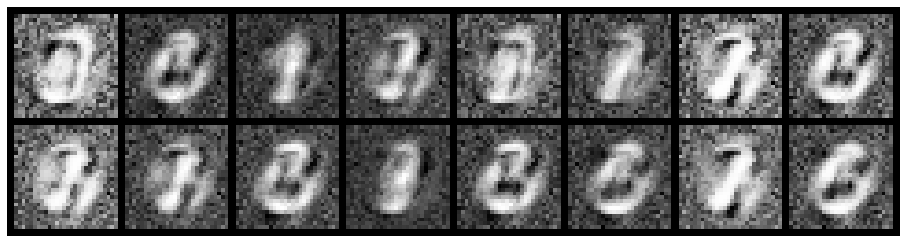

Epoch: [48/200], Batch Num: [0/200]
Discriminator Loss: 0.8135, Generator Loss: 1.5600
D(x): 0.7491, D(G(z)): 0.2962


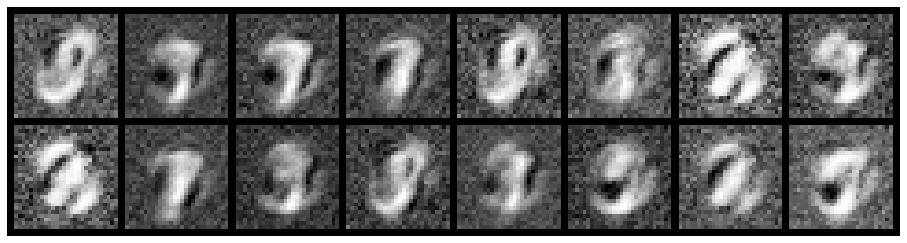

Epoch: [48/200], Batch Num: [100/200]
Discriminator Loss: 0.7404, Generator Loss: 1.6586
D(x): 0.8004, D(G(z)): 0.2688


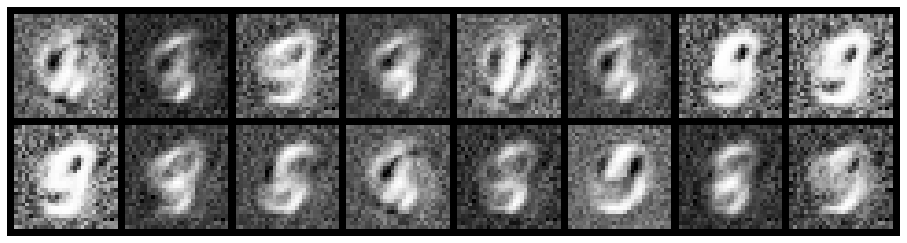

Epoch: [49/200], Batch Num: [0/200]
Discriminator Loss: 1.4009, Generator Loss: 0.9135
D(x): 0.5352, D(G(z)): 0.4281


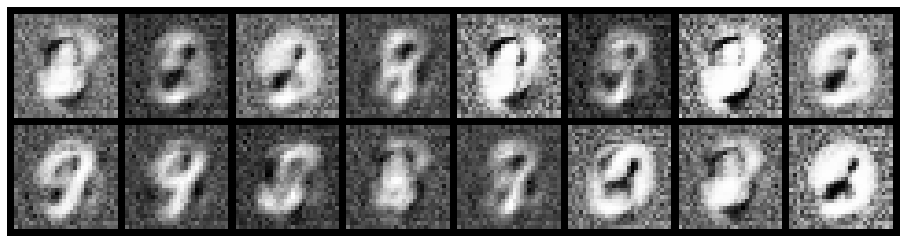

Epoch: [49/200], Batch Num: [100/200]
Discriminator Loss: 0.9691, Generator Loss: 2.6267
D(x): 0.7271, D(G(z)): 0.2323


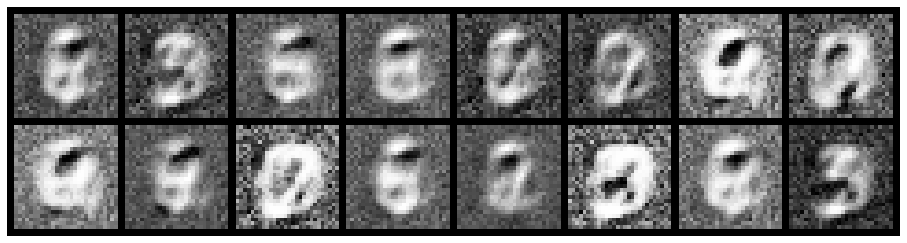

Epoch: [50/200], Batch Num: [0/200]
Discriminator Loss: 0.9975, Generator Loss: 1.9442
D(x): 0.7054, D(G(z)): 0.2694


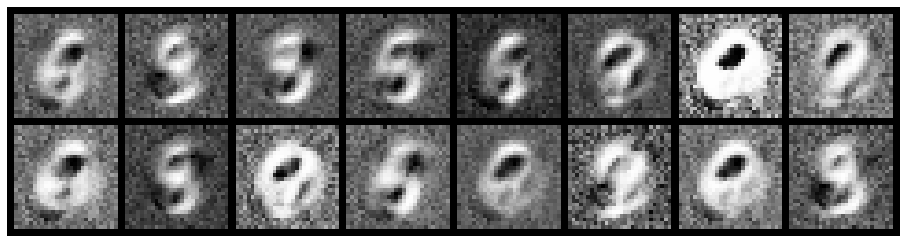

Epoch: [50/200], Batch Num: [100/200]
Discriminator Loss: 1.0529, Generator Loss: 1.3046
D(x): 0.6765, D(G(z)): 0.3751


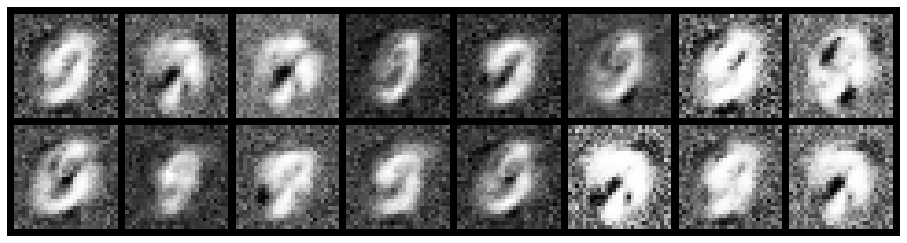

Epoch: [51/200], Batch Num: [0/200]
Discriminator Loss: 0.7107, Generator Loss: 1.9495
D(x): 0.7790, D(G(z)): 0.2208


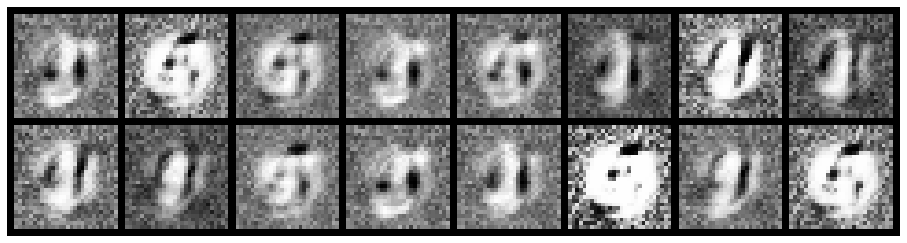

Epoch: [51/200], Batch Num: [100/200]
Discriminator Loss: 0.6353, Generator Loss: 1.8167
D(x): 0.8124, D(G(z)): 0.2547


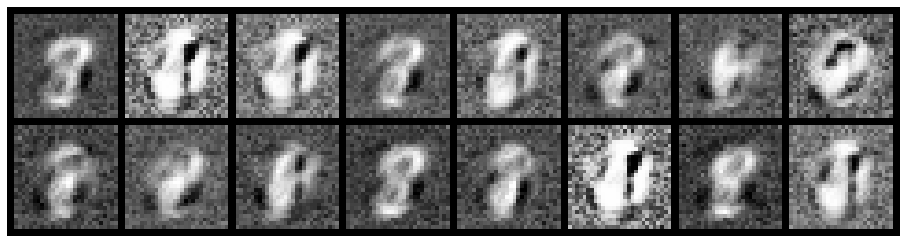

Epoch: [52/200], Batch Num: [0/200]
Discriminator Loss: 0.5244, Generator Loss: 2.4259
D(x): 0.8461, D(G(z)): 0.2195


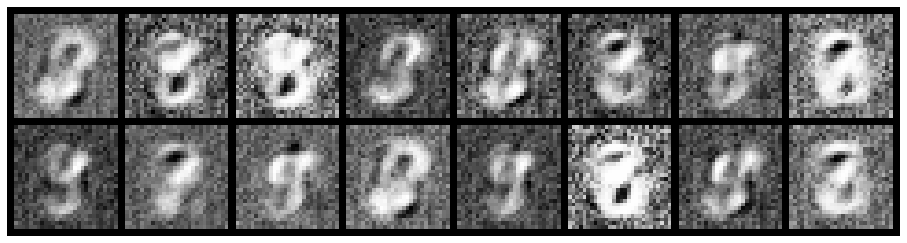

Epoch: [52/200], Batch Num: [100/200]
Discriminator Loss: 0.8836, Generator Loss: 2.0365
D(x): 0.7610, D(G(z)): 0.2722


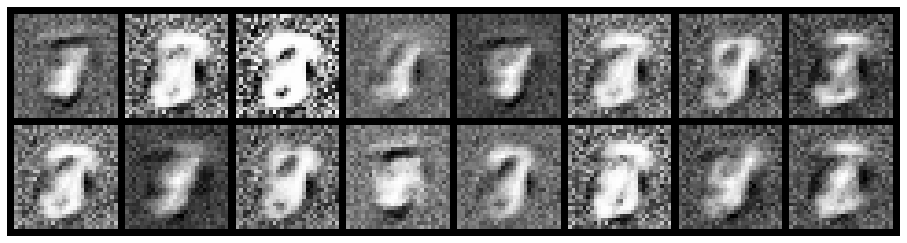

Epoch: [53/200], Batch Num: [0/200]
Discriminator Loss: 0.7086, Generator Loss: 2.7961
D(x): 0.8957, D(G(z)): 0.3009


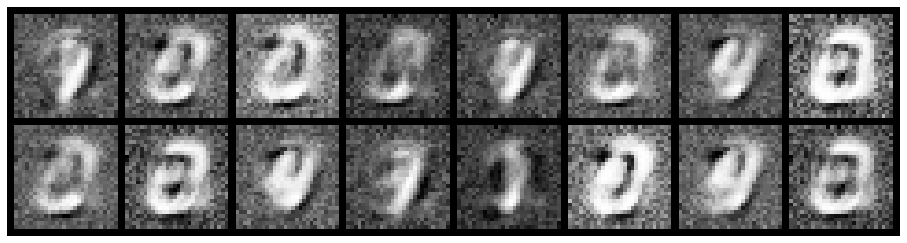

Epoch: [53/200], Batch Num: [100/200]
Discriminator Loss: 1.3126, Generator Loss: 1.6881
D(x): 0.7030, D(G(z)): 0.3180


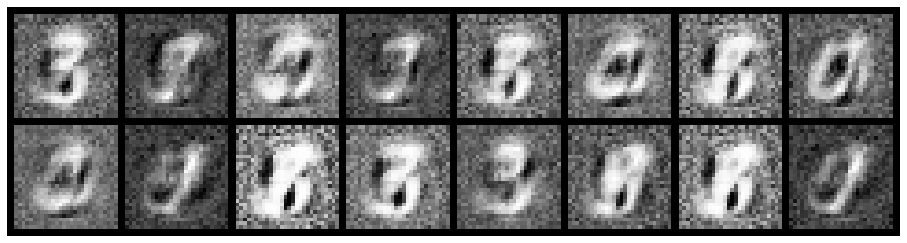

Epoch: [54/200], Batch Num: [0/200]
Discriminator Loss: 1.2041, Generator Loss: 1.5148
D(x): 0.6697, D(G(z)): 0.3444


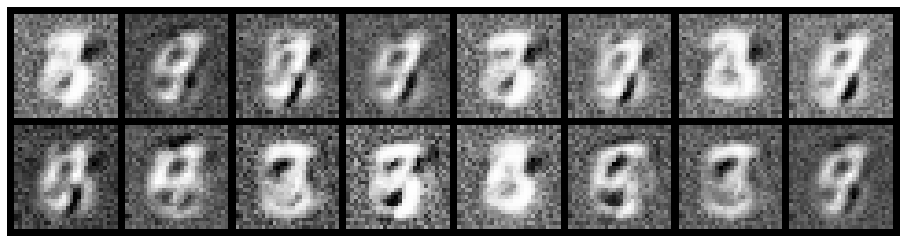

Epoch: [54/200], Batch Num: [100/200]
Discriminator Loss: 0.9981, Generator Loss: 1.4663
D(x): 0.6331, D(G(z)): 0.3061


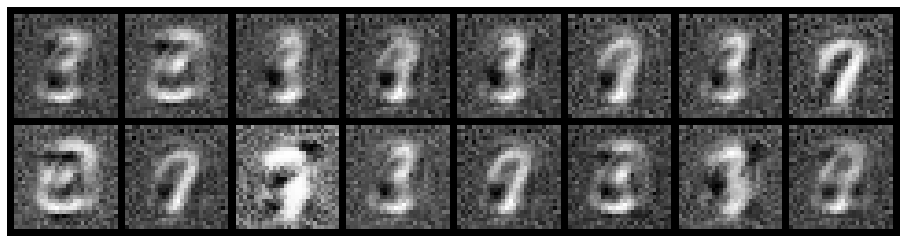

Epoch: [55/200], Batch Num: [0/200]
Discriminator Loss: 1.0795, Generator Loss: 2.2613
D(x): 0.7504, D(G(z)): 0.2712


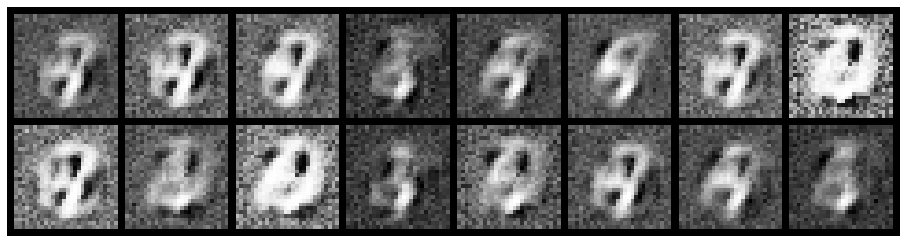

Epoch: [55/200], Batch Num: [100/200]
Discriminator Loss: 0.8350, Generator Loss: 1.3744
D(x): 0.7523, D(G(z)): 0.3398


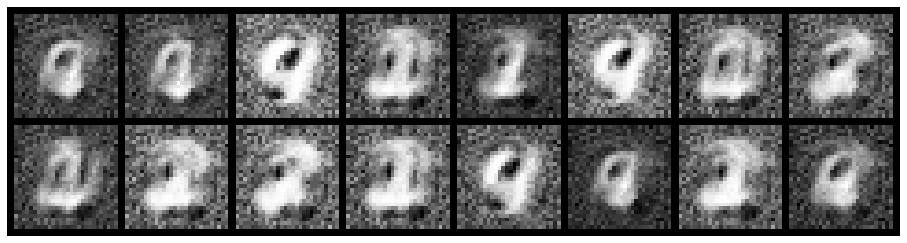

Epoch: [56/200], Batch Num: [0/200]
Discriminator Loss: 0.7909, Generator Loss: 2.1329
D(x): 0.7828, D(G(z)): 0.2159


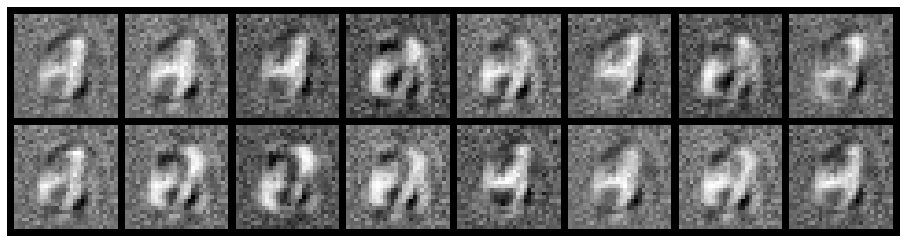

Epoch: [56/200], Batch Num: [100/200]
Discriminator Loss: 0.5835, Generator Loss: 1.7864
D(x): 0.8348, D(G(z)): 0.2436


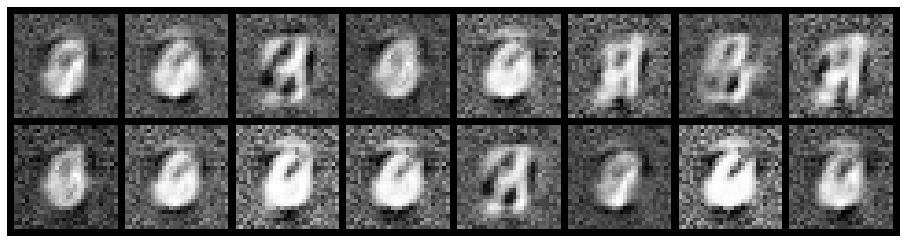

Epoch: [57/200], Batch Num: [0/200]
Discriminator Loss: 0.7829, Generator Loss: 1.9427
D(x): 0.7551, D(G(z)): 0.2392


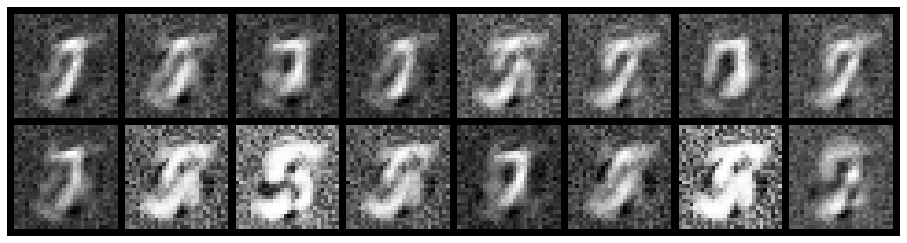

Epoch: [57/200], Batch Num: [100/200]
Discriminator Loss: 0.7973, Generator Loss: 1.8932
D(x): 0.7525, D(G(z)): 0.2332


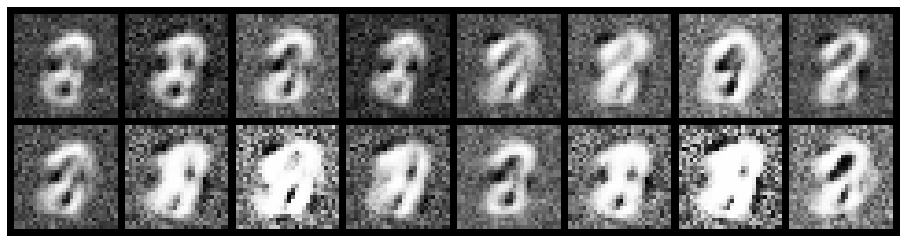

Epoch: [58/200], Batch Num: [0/200]
Discriminator Loss: 0.7526, Generator Loss: 1.8125
D(x): 0.6816, D(G(z)): 0.1934


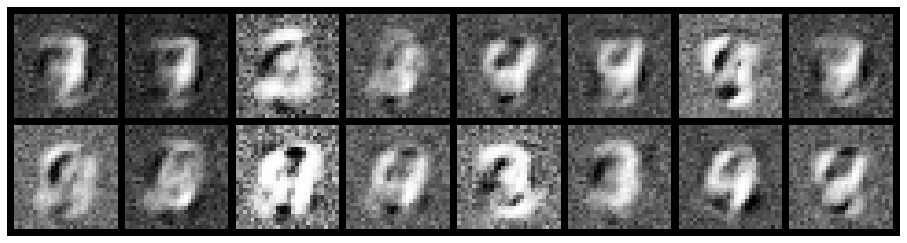

Epoch: [58/200], Batch Num: [100/200]
Discriminator Loss: 1.0720, Generator Loss: 2.8594
D(x): 0.7088, D(G(z)): 0.1902


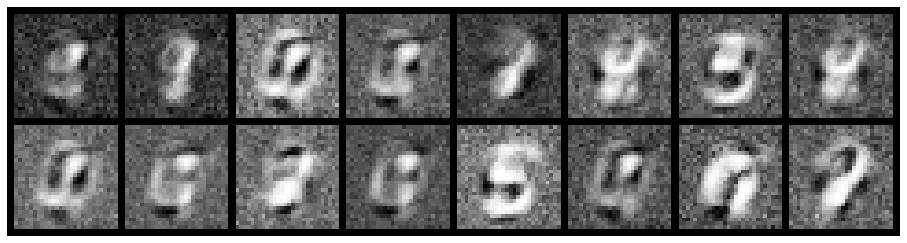

Epoch: [59/200], Batch Num: [0/200]
Discriminator Loss: 1.1701, Generator Loss: 1.6080
D(x): 0.6880, D(G(z)): 0.3045


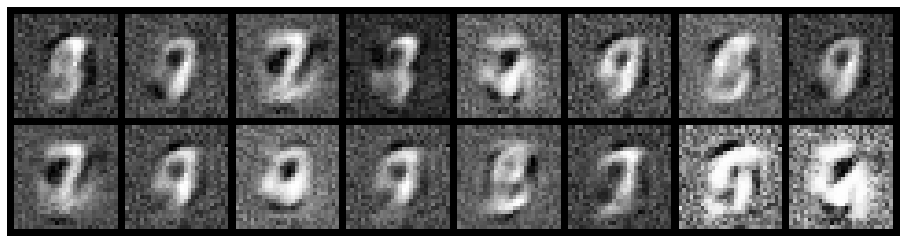

Epoch: [59/200], Batch Num: [100/200]
Discriminator Loss: 1.0342, Generator Loss: 1.9007
D(x): 0.6862, D(G(z)): 0.2631


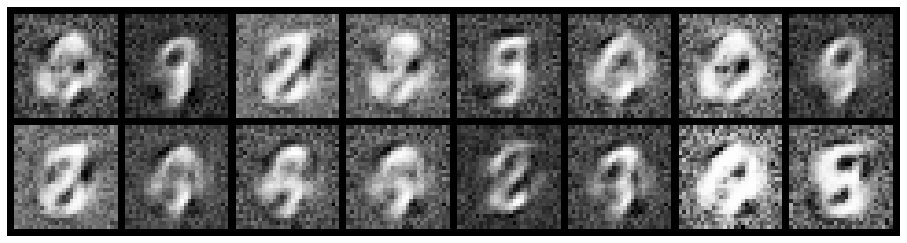

Epoch: [60/200], Batch Num: [0/200]
Discriminator Loss: 1.1796, Generator Loss: 1.4088
D(x): 0.6294, D(G(z)): 0.3793


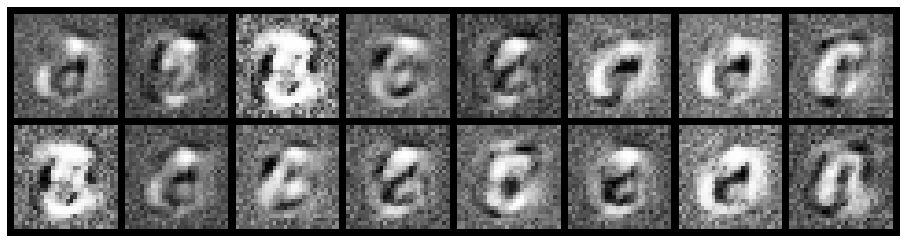

Epoch: [60/200], Batch Num: [100/200]
Discriminator Loss: 0.9054, Generator Loss: 1.8252
D(x): 0.7292, D(G(z)): 0.2952


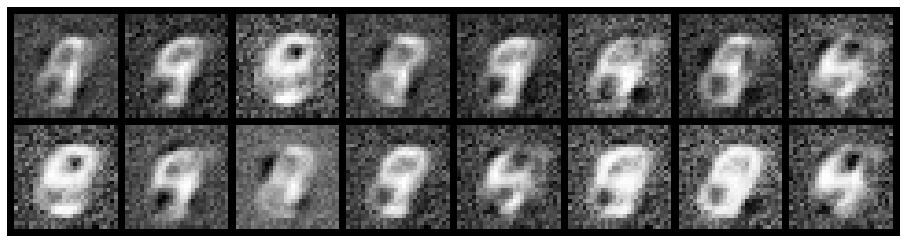

Epoch: [61/200], Batch Num: [0/200]
Discriminator Loss: 0.6562, Generator Loss: 1.9717
D(x): 0.7742, D(G(z)): 0.2058


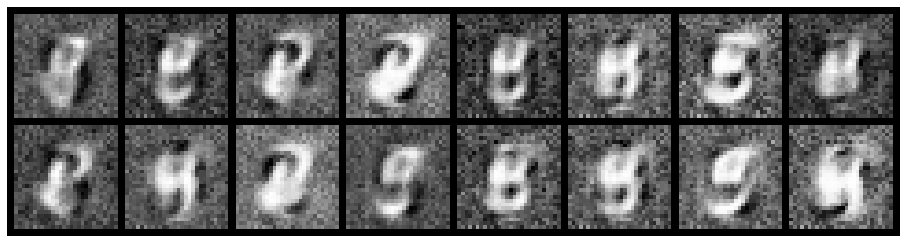

Epoch: [61/200], Batch Num: [100/200]
Discriminator Loss: 0.8436, Generator Loss: 1.5347
D(x): 0.7418, D(G(z)): 0.3281


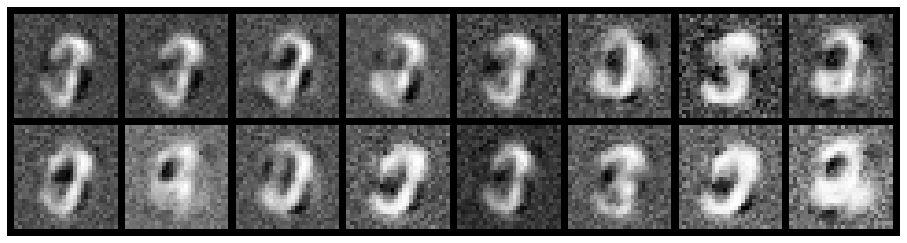

Epoch: [62/200], Batch Num: [0/200]
Discriminator Loss: 0.4747, Generator Loss: 1.7183
D(x): 0.8925, D(G(z)): 0.2474


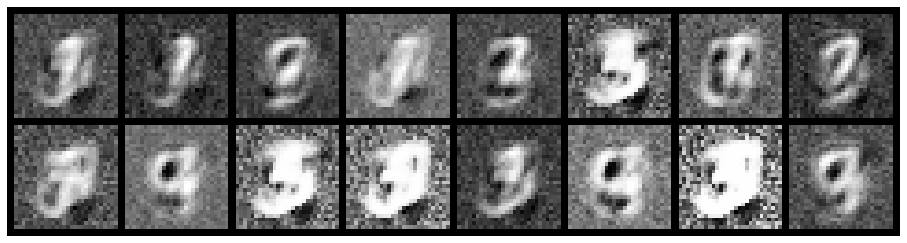

Epoch: [62/200], Batch Num: [100/200]
Discriminator Loss: 0.9909, Generator Loss: 1.7202
D(x): 0.7241, D(G(z)): 0.2982


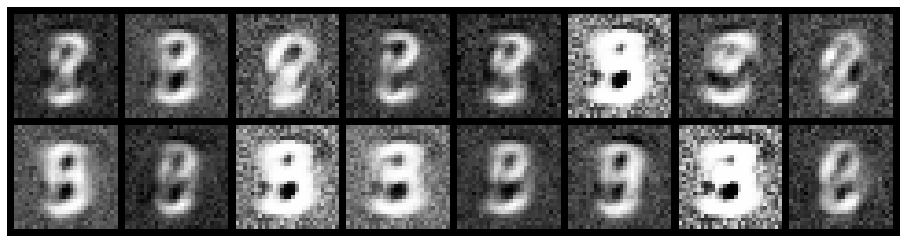

Epoch: [63/200], Batch Num: [0/200]
Discriminator Loss: 0.7831, Generator Loss: 1.4059
D(x): 0.7296, D(G(z)): 0.3009


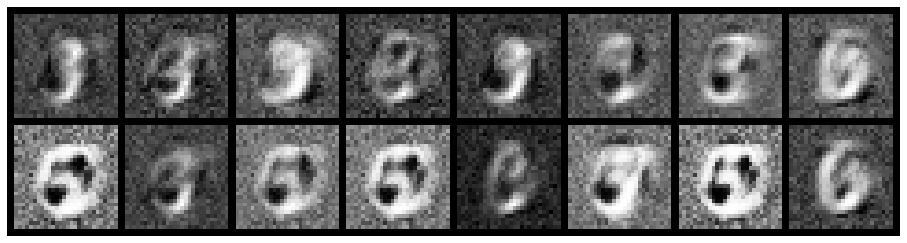

Epoch: [63/200], Batch Num: [100/200]
Discriminator Loss: 1.3313, Generator Loss: 1.6698
D(x): 0.5893, D(G(z)): 0.3280


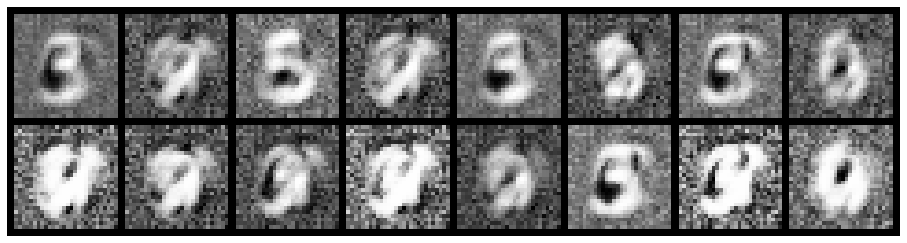

Epoch: [64/200], Batch Num: [0/200]
Discriminator Loss: 0.8663, Generator Loss: 2.0881
D(x): 0.7286, D(G(z)): 0.2422


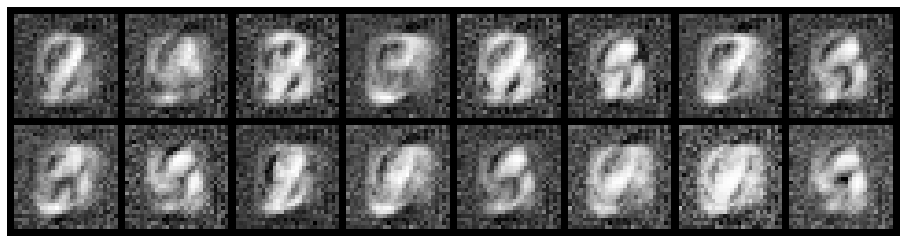

Epoch: [64/200], Batch Num: [100/200]
Discriminator Loss: 0.7018, Generator Loss: 1.4246
D(x): 0.7443, D(G(z)): 0.2687


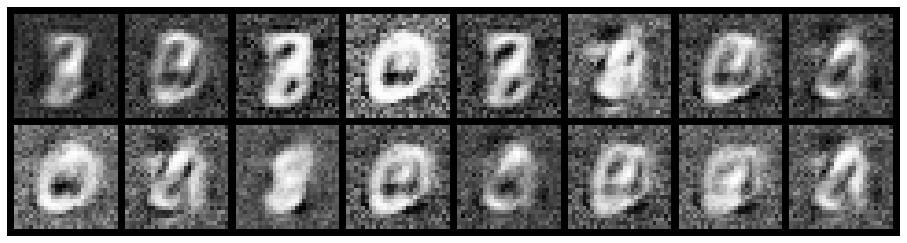

Epoch: [65/200], Batch Num: [0/200]
Discriminator Loss: 0.6393, Generator Loss: 1.8856
D(x): 0.8147, D(G(z)): 0.2301


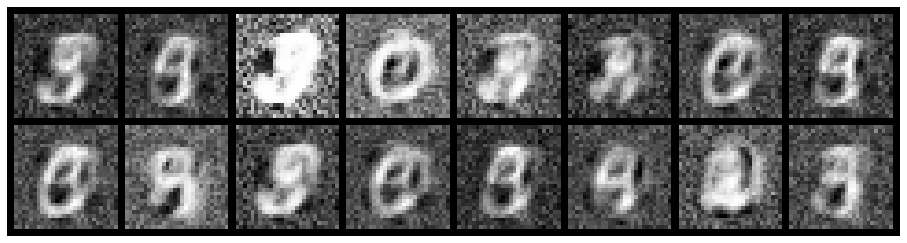

Epoch: [65/200], Batch Num: [100/200]
Discriminator Loss: 0.7929, Generator Loss: 1.6580
D(x): 0.7501, D(G(z)): 0.2647


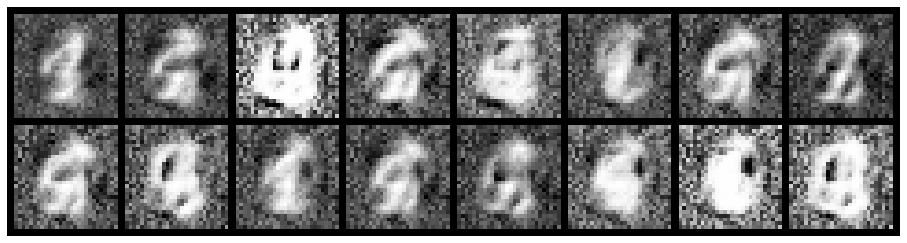

Epoch: [66/200], Batch Num: [0/200]
Discriminator Loss: 0.8530, Generator Loss: 2.3929
D(x): 0.7065, D(G(z)): 0.2150


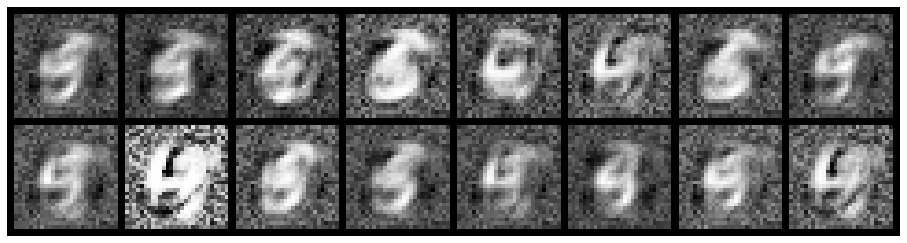

Epoch: [66/200], Batch Num: [100/200]
Discriminator Loss: 0.9816, Generator Loss: 1.4255
D(x): 0.7100, D(G(z)): 0.3409


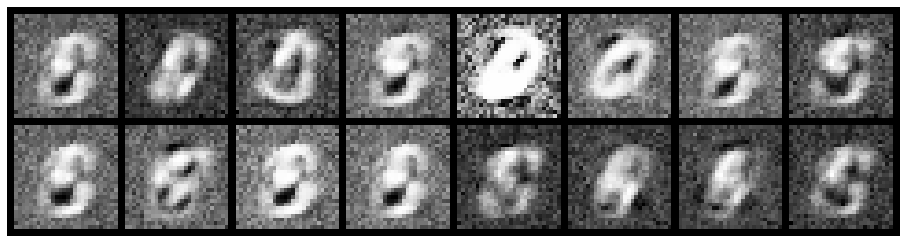

Epoch: [67/200], Batch Num: [0/200]
Discriminator Loss: 0.8958, Generator Loss: 1.9162
D(x): 0.7460, D(G(z)): 0.2690


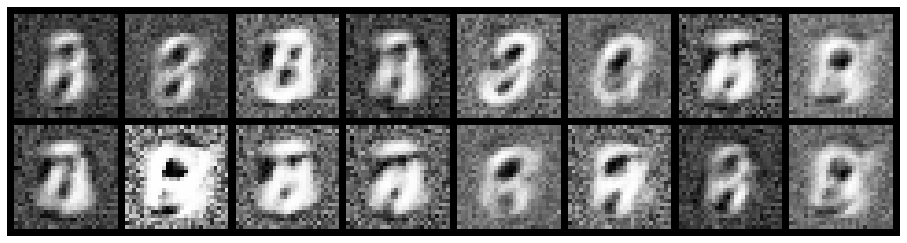

Epoch: [67/200], Batch Num: [100/200]
Discriminator Loss: 0.5681, Generator Loss: 2.1855
D(x): 0.8410, D(G(z)): 0.2359


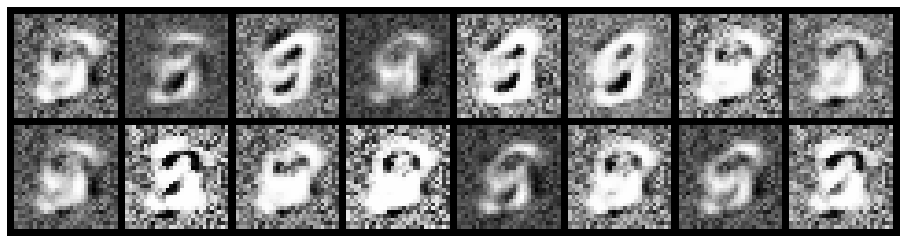

Epoch: [68/200], Batch Num: [0/200]
Discriminator Loss: 1.0090, Generator Loss: 1.7138
D(x): 0.6967, D(G(z)): 0.2718


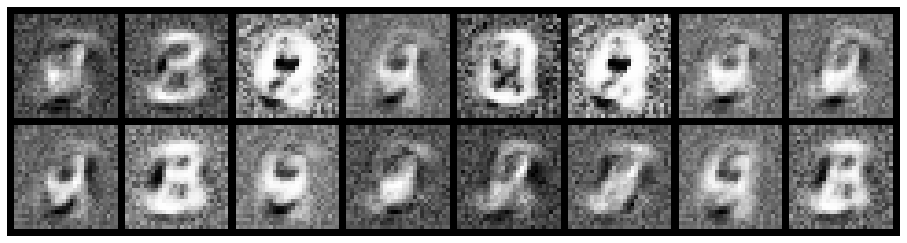

Epoch: [68/200], Batch Num: [100/200]
Discriminator Loss: 0.6317, Generator Loss: 2.1514
D(x): 0.8316, D(G(z)): 0.2397


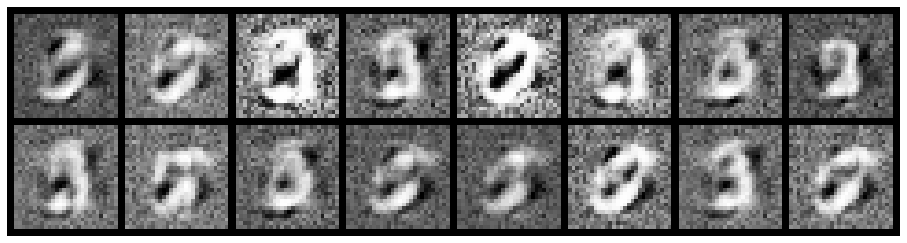

Epoch: [69/200], Batch Num: [0/200]
Discriminator Loss: 1.0078, Generator Loss: 1.7224
D(x): 0.6928, D(G(z)): 0.3127


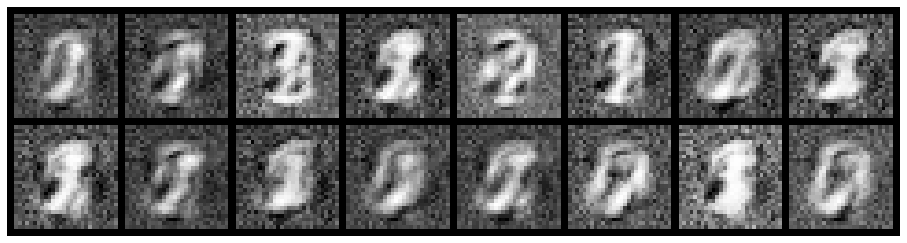

Epoch: [69/200], Batch Num: [100/200]
Discriminator Loss: 0.9517, Generator Loss: 1.9930
D(x): 0.7496, D(G(z)): 0.2656


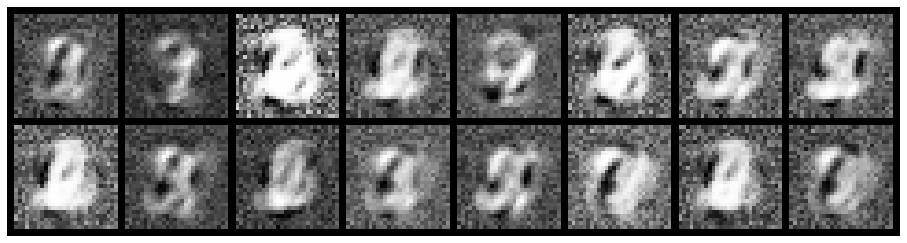

Epoch: [70/200], Batch Num: [0/200]
Discriminator Loss: 0.8699, Generator Loss: 1.6180
D(x): 0.7413, D(G(z)): 0.3124


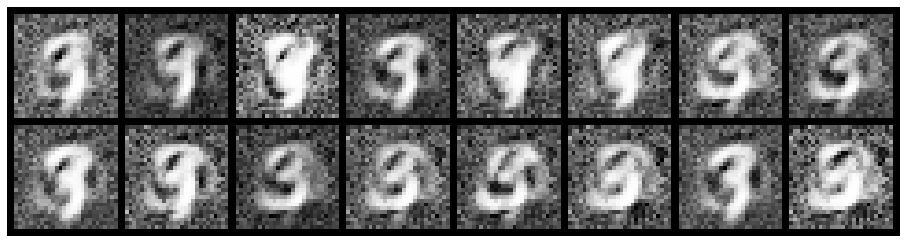

Epoch: [70/200], Batch Num: [100/200]
Discriminator Loss: 1.2797, Generator Loss: 1.6627
D(x): 0.6084, D(G(z)): 0.2926


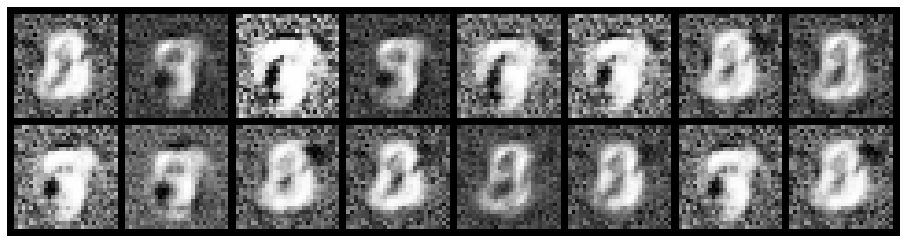

Epoch: [71/200], Batch Num: [0/200]
Discriminator Loss: 0.9296, Generator Loss: 2.6614
D(x): 0.7215, D(G(z)): 0.2178


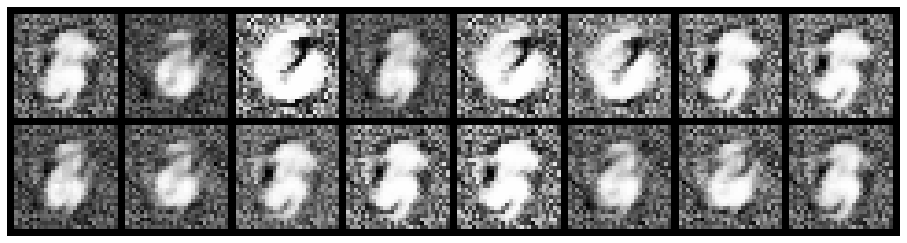

Epoch: [71/200], Batch Num: [100/200]
Discriminator Loss: 0.8962, Generator Loss: 2.2017
D(x): 0.7214, D(G(z)): 0.2801


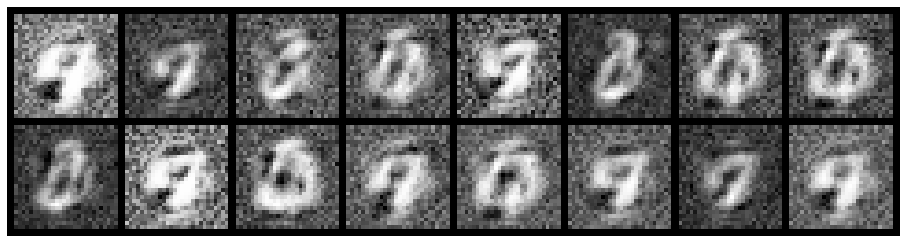

Epoch: [72/200], Batch Num: [0/200]
Discriminator Loss: 0.8791, Generator Loss: 2.0116
D(x): 0.7442, D(G(z)): 0.2462


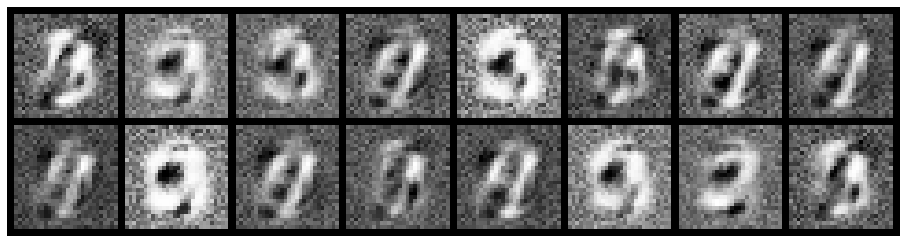

Epoch: [72/200], Batch Num: [100/200]
Discriminator Loss: 0.7477, Generator Loss: 2.0862
D(x): 0.7731, D(G(z)): 0.2173


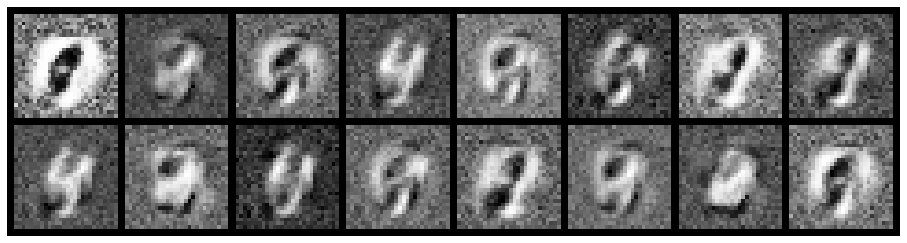

Epoch: [73/200], Batch Num: [0/200]
Discriminator Loss: 1.1785, Generator Loss: 1.6144
D(x): 0.7011, D(G(z)): 0.3476


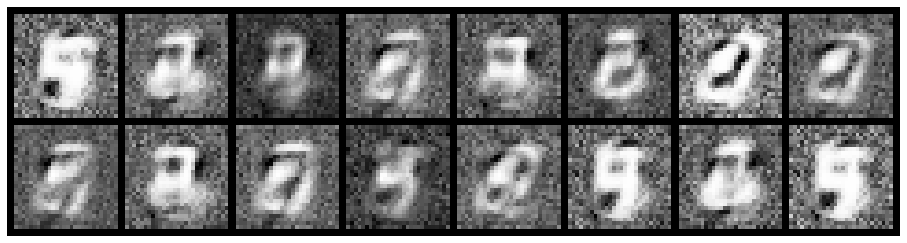

Epoch: [73/200], Batch Num: [100/200]
Discriminator Loss: 0.9161, Generator Loss: 1.9269
D(x): 0.7145, D(G(z)): 0.2429


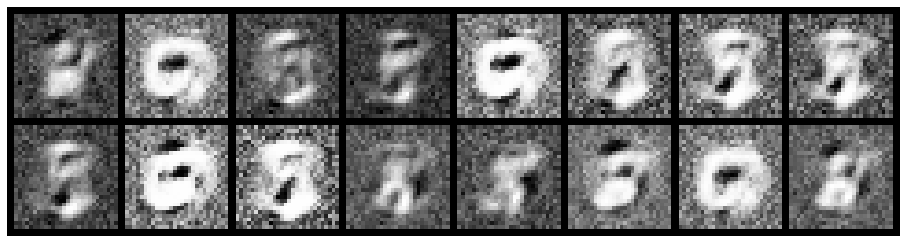

Epoch: [74/200], Batch Num: [0/200]
Discriminator Loss: 1.0965, Generator Loss: 1.3334
D(x): 0.6804, D(G(z)): 0.3316


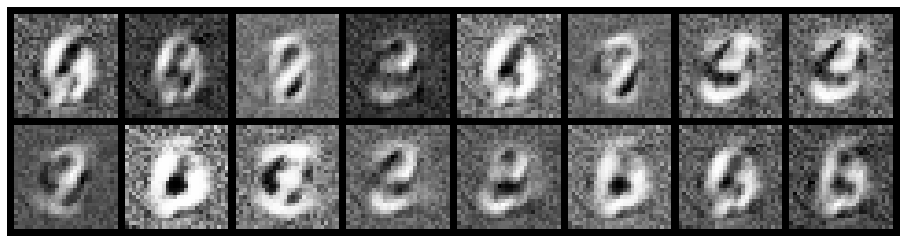

Epoch: [74/200], Batch Num: [100/200]
Discriminator Loss: 0.7564, Generator Loss: 1.8727
D(x): 0.7769, D(G(z)): 0.2356


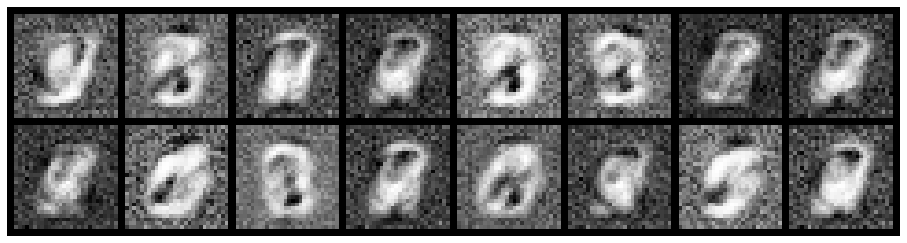

Epoch: [75/200], Batch Num: [0/200]
Discriminator Loss: 0.7564, Generator Loss: 1.4252
D(x): 0.7411, D(G(z)): 0.2754


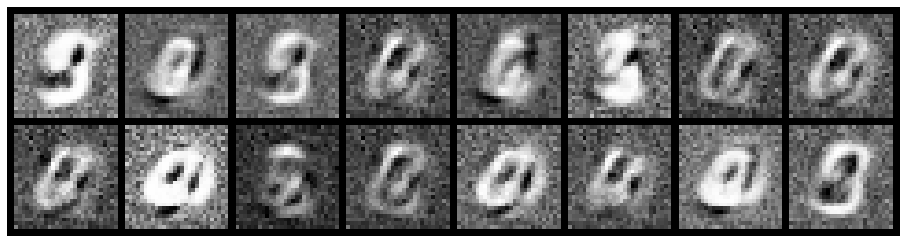

Epoch: [75/200], Batch Num: [100/200]
Discriminator Loss: 0.5095, Generator Loss: 1.9596
D(x): 0.8708, D(G(z)): 0.2229


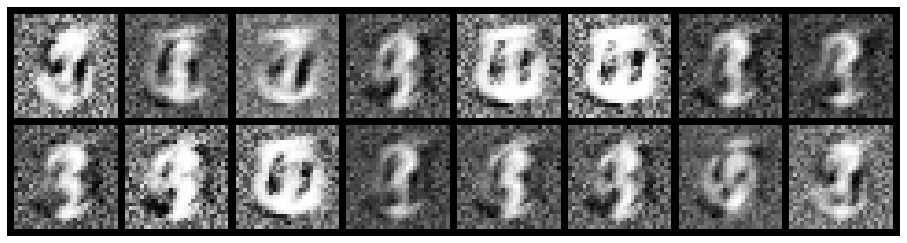

Epoch: [76/200], Batch Num: [0/200]
Discriminator Loss: 0.8635, Generator Loss: 2.2330
D(x): 0.7009, D(G(z)): 0.2498


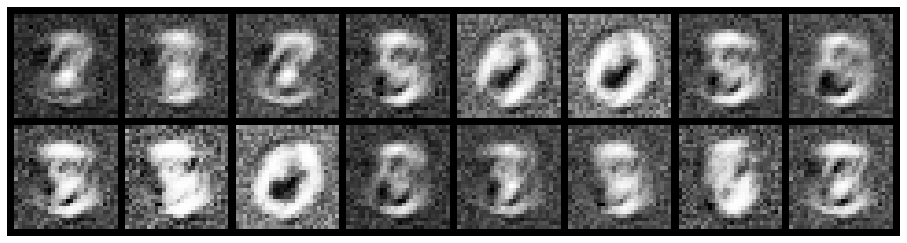

Epoch: [76/200], Batch Num: [100/200]
Discriminator Loss: 1.0958, Generator Loss: 2.1376
D(x): 0.7122, D(G(z)): 0.2372


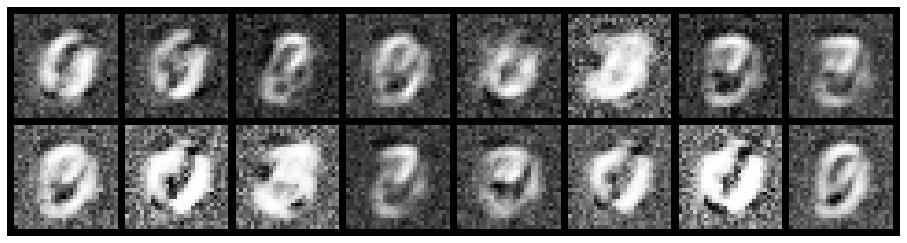

Epoch: [77/200], Batch Num: [0/200]
Discriminator Loss: 0.7681, Generator Loss: 1.7221
D(x): 0.7656, D(G(z)): 0.2572


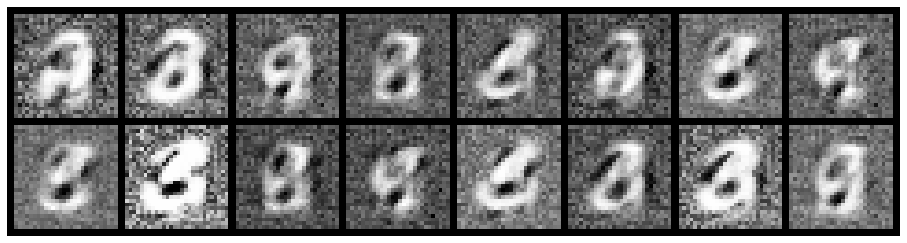

Epoch: [77/200], Batch Num: [100/200]
Discriminator Loss: 0.9664, Generator Loss: 1.5112
D(x): 0.7142, D(G(z)): 0.3054


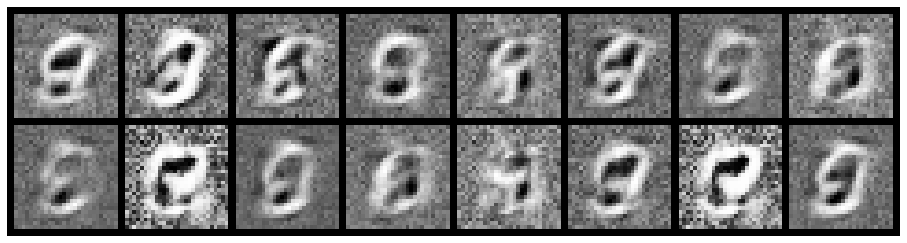

Epoch: [78/200], Batch Num: [0/200]
Discriminator Loss: 1.1360, Generator Loss: 2.1807
D(x): 0.6293, D(G(z)): 0.2768


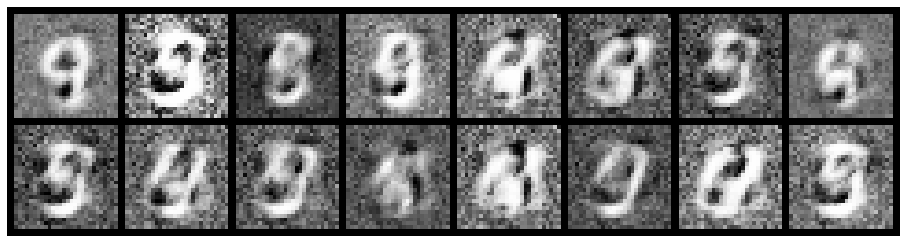

Epoch: [78/200], Batch Num: [100/200]
Discriminator Loss: 0.8512, Generator Loss: 2.0683
D(x): 0.7363, D(G(z)): 0.2341


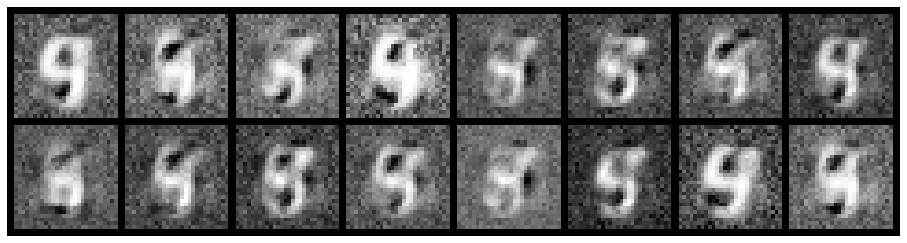

Epoch: [79/200], Batch Num: [0/200]
Discriminator Loss: 0.8974, Generator Loss: 1.7042
D(x): 0.7975, D(G(z)): 0.3140


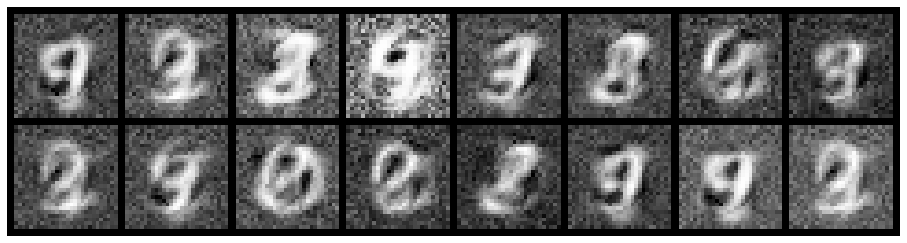

Epoch: [79/200], Batch Num: [100/200]
Discriminator Loss: 0.9398, Generator Loss: 1.0361
D(x): 0.7547, D(G(z)): 0.3975


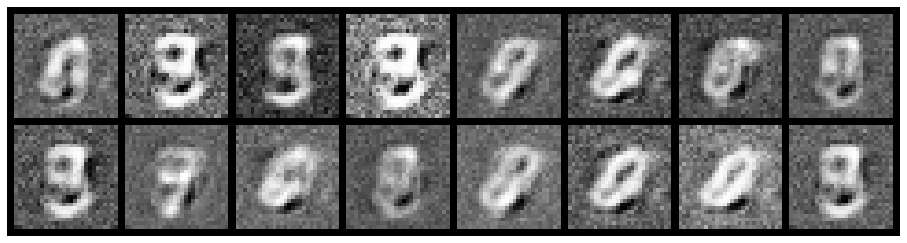

Epoch: [80/200], Batch Num: [0/200]
Discriminator Loss: 1.4520, Generator Loss: 1.9044
D(x): 0.6377, D(G(z)): 0.2836


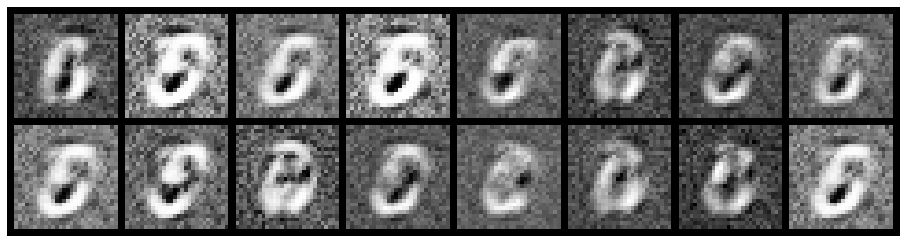

Epoch: [80/200], Batch Num: [100/200]
Discriminator Loss: 0.7647, Generator Loss: 1.8151
D(x): 0.7474, D(G(z)): 0.2230


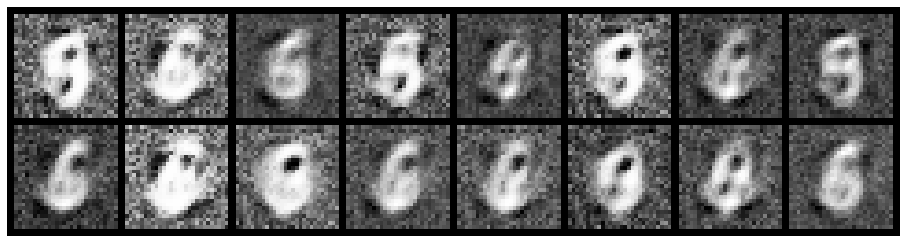

Epoch: [81/200], Batch Num: [0/200]
Discriminator Loss: 0.6110, Generator Loss: 2.6431
D(x): 0.8271, D(G(z)): 0.2028


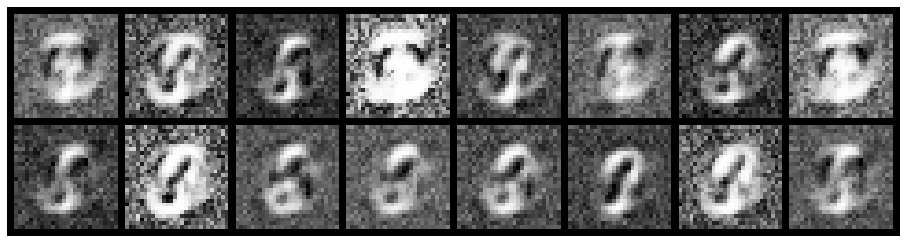

Epoch: [81/200], Batch Num: [100/200]
Discriminator Loss: 0.6904, Generator Loss: 1.9338
D(x): 0.8831, D(G(z)): 0.3159


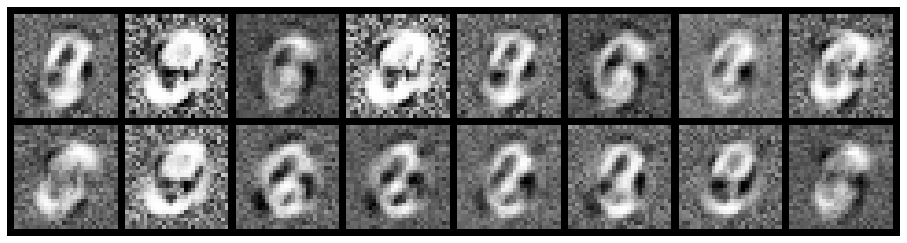

OSError: [Errno 28] No space left on device

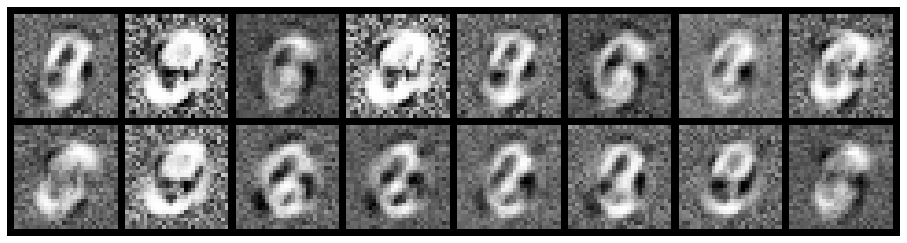

In [42]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake)

# tp nlp